# Chapter 2: Conditional Probability (條件機率)

## 📚 參考資料 (Reference)

本筆記內容改編自：
- **原始來源**: [Introduction to Probability - Chapter 2: Conditional Probability](https://bookdown.org/probability/beta/conditional-probability.html)
- **作者**: Joseph K. Blitzstein and Jessica Hwang
- **書籍**: *Introduction to Probability, Second Edition* (Chapman & Hall/CRC, 2019)
- **授權**: 本筆記僅供學習與教育用途

---

## 🎯 學習目標

在這一章，我們將學習：
1. 條件機率的定義與直覺 (Conditional Probability)
2. 乘法法則 (Multiplication Rule)
3. 貝氏定理 (Bayes' Theorem)
4. 獨立事件 (Independence)
5. Python 實作與機器學習應用

---

## 💡 為什麼條件機率很重要？

在機器學習與深度學習中，條件機率無處不在：
- **分類問題**: $P(\text{類別} | \text{特徵})$ — 給定特徵，預測類別的機率
- **貝氏網路**: 建模變數之間的條件依賴關係
- **生成模型**: $P(\text{資料} | \text{參數})$ — 給定參數，產生資料的機率
- **強化學習**: $P(\text{下一狀態} | \text{當前狀態, 動作})$

讓我們從最基礎的概念開始！

## 1. 條件機率的定義 (Definition of Conditional Probability)

### 📖 理論

**條件機率 (Conditional Probability)**: 在事件 $B$ 已經發生的條件下，事件 $A$ 發生的機率。

$$P(A|B) = \frac{P(A \cap B)}{P(B)}, \quad \text{當 } P(B) > 0$$

**記號**：
- $P(A|B)$ 讀作 "A given B" 或 "A 在 B 條件下"
- $P(A \cap B)$ 是 A 和 B 同時發生的機率（交集）

**直覺理解**：
1. 我們知道 $B$ 已經發生了
2. 這縮小了我們的「樣本空間」（從全部 → 只有 $B$）
3. 在這個縮小的空間中，$A$ 佔多少比例？

### 🎲 例子 1：擲骰子

擲一顆公正的骰子，定義：
- $A$ = {點數大於 4} = {5, 6}
- $B$ = {點數是偶數} = {2, 4, 6}

**問題**：已知骰子擲出偶數，點數大於 4 的機率是多少？

**解答**：
- $P(A \cap B)$ = {6} 的機率 = $\frac{1}{6}$
- $P(B)$ = {2, 4, 6} 的機率 = $\frac{3}{6} = \frac{1}{2}$
- $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/6}{1/2} = \frac{1}{3}$

**直覺驗證**：
- 知道是偶數後，樣本空間從 {1,2,3,4,5,6} 縮小到 {2,4,6}
- 在 {2,4,6} 中，只有 {6} 大於 4
- 所以 $P(A|B) = \frac{1}{3}$ ✓

### 🎲 例子 2：撲克牌

從一副 52 張撲克牌中抽一張：
- $A$ = {抽到 Ace (A)}，4 張，$P(A) = \frac{4}{52}$
- $B$ = {抽到紅色牌 (紅心或方塊)}，26 張，$P(B) = \frac{26}{52} = \frac{1}{2}$

**問題**：已知抽到紅色牌，是 Ace 的機率？

**解答**：
- $P(A \cap B)$ = {紅色 Ace} = 2 張 = $\frac{2}{52}$
- $P(B) = \frac{26}{52}$
- $P(A|B) = \frac{2/52}{26/52} = \frac{2}{26} = \frac{1}{13}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Set, List
import pandas as pd

# ============================================
# 1. 條件機率基本計算
# ============================================

def conditional_probability(p_a_and_b: float, p_b: float) -> float:
    """
    計算條件機率 P(A|B) = P(A ∩ B) / P(B)
    
    Args:
        p_a_and_b: P(A ∩ B) - A 和 B 同時發生的機率
        p_b: P(B) - B 發生的機率
    
    Returns:
        P(A|B) - 在 B 條件下 A 發生的機率
    """
    if p_b == 0:
        raise ValueError("P(B) 不能為 0！")
    return p_a_and_b / p_b

print("=" * 60)
print("🎲 條件機率計算 (Conditional Probability)")
print("=" * 60)

# 例子 1：擲骰子
print("\n例子 1：擲骰子")
print("-" * 60)
# A = {點數大於 4} = {5, 6}
# B = {點數是偶數} = {2, 4, 6}
# A ∩ B = {6}

p_a_and_b = 1/6  # {6}
p_b = 3/6        # {2, 4, 6}
p_a_given_b = conditional_probability(p_a_and_b, p_b)

print(f"A = {{點數大於 4}} = {{5, 6}}")
print(f"B = {{點數是偶數}} = {{2, 4, 6}}")
print(f"A ∩ B = {{6}}")
print(f"\nP(A ∩ B) = {p_a_and_b:.4f}")
print(f"P(B) = {p_b:.4f}")
print(f"P(A|B) = {p_a_given_b:.4f} = {p_a_given_b}")

# 使用模擬驗證
np.random.seed(42)
n_trials = 100000
dice_rolls = np.random.randint(1, 7, n_trials)

# 統計 B 發生的次數（偶數）
b_events = dice_rolls % 2 == 0
n_b = np.sum(b_events)

# 在 B 發生的條件下，統計 A 也發生的次數（大於 4）
a_given_b_events = dice_rolls[b_events] > 4
n_a_given_b = np.sum(a_given_b_events)

simulated_p_a_given_b = n_a_given_b / n_b
print(f"\n模擬驗證 ({n_trials:,} 次)：")
print(f"P(A|B) ≈ {simulated_p_a_given_b:.4f}")
print(f"理論值: {p_a_given_b:.4f}")
print(f"誤差: {abs(simulated_p_a_given_b - p_a_given_b):.4f}")

# 例子 2：撲克牌
print("\n" + "=" * 60)
print("例子 2：撲克牌")
print("-" * 60)
# A = {Ace}，4 張
# B = {紅色牌}，26 張
# A ∩ B = {紅色 Ace}，2 張

p_a = 4/52      # Ace
p_b = 26/52     # 紅色
p_a_and_b = 2/52  # 紅色 Ace
p_a_given_b = conditional_probability(p_a_and_b, p_b)

print(f"A = {{Ace}}，共 4 張")
print(f"B = {{紅色牌}}，共 26 張")
print(f"A ∩ B = {{紅色 Ace}}，共 2 張")
print(f"\nP(A) = {p_a:.4f} = {4}/{52}")
print(f"P(B) = {p_b:.4f} = {26}/{52}")
print(f"P(A ∩ B) = {p_a_and_b:.4f} = {2}/{52}")
print(f"P(A|B) = {p_a_given_b:.4f} = {2}/{26} = 1/13")

# 使用模擬驗證
suits = ['♠', '♥', '♦', '♣']  # 黑桃、紅心、方塊、梅花
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
deck = [(rank, suit) for suit in suits for rank in ranks]

# 模擬抽牌
n_trials = 100000
np.random.seed(42)
draws = [deck[i] for i in np.random.randint(0, 52, n_trials)]

# 統計紅色牌（紅心或方塊）
red_cards = [(r, s) for (r, s) in draws if s in ['♥', '♦']]
n_red = len(red_cards)

# 在紅色牌中，統計 Ace
ace_in_red = [(r, s) for (r, s) in red_cards if r == 'A']
n_ace_in_red = len(ace_in_red)

simulated_p_a_given_b = n_ace_in_red / n_red
print(f"\n模擬驗證 ({n_trials:,} 次)：")
print(f"P(A|B) ≈ {simulated_p_a_given_b:.4f}")
print(f"理論值: {p_a_given_b:.4f}")
print(f"誤差: {abs(simulated_p_a_given_b - p_a_given_b):.4f}")

print("=" * 60)

🎲 條件機率計算 (Conditional Probability)

例子 1：擲骰子
------------------------------------------------------------
A = {點數大於 4} = {5, 6}
B = {點數是偶數} = {2, 4, 6}
A ∩ B = {6}

P(A ∩ B) = 0.1667
P(B) = 0.5000
P(A|B) = 0.3333 = 0.3333333333333333

模擬驗證 (100,000 次)：
P(A|B) ≈ 0.3313
理論值: 0.3333
誤差: 0.0021

例子 2：撲克牌
------------------------------------------------------------
A = {Ace}，共 4 張
B = {紅色牌}，共 26 張
A ∩ B = {紅色 Ace}，共 2 張

P(A) = 0.0769 = 4/52
P(B) = 0.5000 = 26/52
P(A ∩ B) = 0.0385 = 2/52
P(A|B) = 0.0769 = 2/26 = 1/13

模擬驗證 (100,000 次)：
P(A|B) ≈ 0.0746
理論值: 0.0769
誤差: 0.0023


## 2. 乘法法則 (Multiplication Rule)

### 📖 理論

從條件機率的定義，我們可以推導出**乘法法則**：

$$P(A \cap B) = P(B) \cdot P(A|B)$$

或者對稱地：

$$P(A \cap B) = P(A) \cdot P(B|A)$$

**推廣到多個事件**：

$$P(A_1 \cap A_2 \cap \cdots \cap A_n) = P(A_1) \cdot P(A_2|A_1) \cdot P(A_3|A_1 \cap A_2) \cdots$$

**直覺理解**：
- 想像一個「連鎖反應」
- 第一步：$A_1$ 發生的機率是 $P(A_1)$
- 第二步：在 $A_1$ 已發生的條件下，$A_2$ 發生的機率是 $P(A_2|A_1)$
- 兩步都要發生，所以相乘

### 🎲 例子 1：不放回抽球

一個袋子裡有 3 個紅球、2 個藍球，連續抽 2 次（不放回）。

**問題**：兩次都抽到紅球的機率？

**解答**：
- 定義 $R_1$ = 第一次抽到紅球，$R_2$ = 第二次抽到紅球
- $P(R_1) = \frac{3}{5}$
- $P(R_2|R_1) = \frac{2}{4}$ （第一次拿走 1 個紅球後，剩 2 個紅球、4 個球）
- $P(R_1 \cap R_2) = P(R_1) \cdot P(R_2|R_1) = \frac{3}{5} \times \frac{2}{4} = \frac{6}{20} = \frac{3}{10}$

### 🎲 例子 2：連續擲硬幣

擲一枚公正硬幣 3 次，3 次都是正面的機率？

**解答**：
- 定義 $H_i$ = 第 $i$ 次是正面
- 因為每次是獨立的（後面會詳細討論），$P(H_i|H_1 \cap \cdots \cap H_{i-1}) = P(H_i) = \frac{1}{2}$
- $P(H_1 \cap H_2 \cap H_3) = \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} = \frac{1}{8}$

### 🎲 例子 3：品管檢測

一條產線的良率是 95%（第一次檢測），但第一次通過的產品中，有 2% 在第二次檢測會被發現瑕疵。

**問題**：產品通過兩次檢測的機率？

**解答**：
- $P(\text{通過第一次}) = 0.95$
- $P(\text{通過第二次}|\text{通過第一次}) = 0.98$
- $P(\text{兩次都通過}) = 0.95 \times 0.98 = 0.931 = 93.1\%$

In [2]:
# ============================================
# 2. 乘法法則 (Multiplication Rule)
# ============================================

print("\n" + "=" * 60)
print("🔗 乘法法則 (Multiplication Rule)")
print("=" * 60)

# 例子 1：不放回抽球
print("\n例子 1：不放回抽球")
print("-" * 60)
print("袋子裡有 3 個紅球、2 個藍球")
print("連續抽 2 次（不放回），兩次都是紅球的機率？")

# 理論計算
p_r1 = 3/5  # 第一次抽到紅球
p_r2_given_r1 = 2/4  # 第一次是紅球後，第二次抽到紅球
p_both_red = p_r1 * p_r2_given_r1

print(f"\nP(R₁) = 3/5 = {p_r1:.4f}")
print(f"P(R₂|R₁) = 2/4 = {p_r2_given_r1:.4f}")
print(f"P(R₁ ∩ R₂) = P(R₁) × P(R₂|R₁) = {p_both_red:.4f} = 3/10")

# 模擬驗證
def simulate_draw_without_replacement(n_trials=100000):
    """模擬不放回抽球"""
    balls = ['R', 'R', 'R', 'B', 'B']  # 3 紅 2 藍
    both_red = 0
    
    np.random.seed(42)
    for _ in range(n_trials):
        # 每次重新洗牌
        shuffled = np.random.permutation(balls)
        # 抽前兩個
        if shuffled[0] == 'R' and shuffled[1] == 'R':
            both_red += 1
    
    return both_red / n_trials

simulated = simulate_draw_without_replacement(100000)
print(f"\n模擬驗證 (100,000 次)：")
print(f"P(兩次都是紅球) ≈ {simulated:.4f}")
print(f"理論值: {p_both_red:.4f}")
print(f"誤差: {abs(simulated - p_both_red):.4f}")

# 例子 2：連續擲硬幣
print("\n" + "=" * 60)
print("例子 2：連續擲硬幣")
print("-" * 60)
print("擲一枚公正硬幣 3 次，3 次都是正面的機率？")

# 理論計算
p_h = 0.5  # 每次正面的機率
p_3_heads = p_h ** 3

print(f"\nP(H) = {p_h}")
print(f"P(H₁ ∩ H₂ ∩ H₃) = (1/2)³ = {p_3_heads:.4f} = 1/8")

# 模擬驗證
n_trials = 100000
np.random.seed(42)
three_heads = 0

for _ in range(n_trials):
    flips = np.random.choice(['H', 'T'], size=3)
    if np.all(flips == 'H'):
        three_heads += 1

simulated = three_heads / n_trials
print(f"\n模擬驗證 ({n_trials:,} 次)：")
print(f"P(3 次都正面) ≈ {simulated:.4f}")
print(f"理論值: {p_3_heads:.4f}")

# 例子 3：品管檢測
print("\n" + "=" * 60)
print("例子 3：品管檢測")
print("-" * 60)
print("產線良率：第一次檢測 95% 通過")
print("通過第一次的產品中，98% 能通過第二次檢測")

p_pass1 = 0.95
p_pass2_given_pass1 = 0.98
p_pass_both = p_pass1 * p_pass2_given_pass1

print(f"\nP(通過第一次) = {p_pass1}")
print(f"P(通過第二次|通過第一次) = {p_pass2_given_pass1}")
print(f"P(兩次都通過) = {p_pass1} × {p_pass2_given_pass1} = {p_pass_both:.4f} = {p_pass_both*100:.1f}%")

# 模擬驗證
n_products = 100000
np.random.seed(42)

# 第一次檢測
pass_first = np.random.random(n_products) < p_pass1
n_pass_first = np.sum(pass_first)

# 在通過第一次的產品中，進行第二次檢測
pass_second = np.random.random(n_pass_first) < p_pass2_given_pass1
n_pass_both = np.sum(pass_second)

simulated = n_pass_both / n_products
print(f"\n模擬驗證 ({n_products:,} 個產品)：")
print(f"兩次都通過的比例 ≈ {simulated:.4f} = {simulated*100:.1f}%")
print(f"理論值: {p_pass_both:.4f}")

print("=" * 60)


🔗 乘法法則 (Multiplication Rule)

例子 1：不放回抽球
------------------------------------------------------------
袋子裡有 3 個紅球、2 個藍球
連續抽 2 次（不放回），兩次都是紅球的機率？

P(R₁) = 3/5 = 0.6000
P(R₂|R₁) = 2/4 = 0.5000
P(R₁ ∩ R₂) = P(R₁) × P(R₂|R₁) = 0.3000 = 3/10

模擬驗證 (100,000 次)：
P(兩次都是紅球) ≈ 0.3015
理論值: 0.3000
誤差: 0.0015

例子 2：連續擲硬幣
------------------------------------------------------------
擲一枚公正硬幣 3 次，3 次都是正面的機率？

P(H) = 0.5
P(H₁ ∩ H₂ ∩ H₃) = (1/2)³ = 0.1250 = 1/8

模擬驗證 (100,000 次)：
P(3 次都正面) ≈ 0.1248
理論值: 0.1250

例子 3：品管檢測
------------------------------------------------------------
產線良率：第一次檢測 95% 通過
通過第一次的產品中，98% 能通過第二次檢測

P(通過第一次) = 0.95
P(通過第二次|通過第一次) = 0.98
P(兩次都通過) = 0.95 × 0.98 = 0.9310 = 93.1%

模擬驗證 (100,000 個產品)：
兩次都通過的比例 ≈ 0.9324 = 93.2%
理論值: 0.9310

模擬驗證 (100,000 次)：
P(3 次都正面) ≈ 0.1248
理論值: 0.1250

例子 3：品管檢測
------------------------------------------------------------
產線良率：第一次檢測 95% 通過
通過第一次的產品中，98% 能通過第二次檢測

P(通過第一次) = 0.95
P(通過第二次|通過第一次) = 0.98
P(兩次都通過) = 0.95 × 0.98 = 0.9310 = 93.1%

模擬驗證 (100,

## 3. 貝氏定理 (Bayes' Theorem)

### 📖 理論

**貝氏定理 (Bayes' Theorem)**: 最重要的機率公式之一！

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

**推導**：
從乘法法則的兩種形式：
- $P(A \cap B) = P(A) \cdot P(B|A)$
- $P(A \cap B) = P(B) \cdot P(A|B)$

兩式相等，移項即得貝氏定理。

**全機率公式 (Law of Total Probability)**：
如果 $A_1, A_2, \ldots, A_n$ 是樣本空間的一個分割（互斥且完整），則：

$$P(B) = \sum_{i=1}^{n} P(B|A_i) \cdot P(A_i)$$

**貝氏定理的完整形式**：

$$P(A_i|B) = \frac{P(B|A_i) \cdot P(A_i)}{\sum_{j=1}^{n} P(B|A_j) \cdot P(A_j)}$$

**術語**：
- $P(A)$ = **先驗機率 (Prior)** — 在看到證據 $B$ 之前，$A$ 的機率
- $P(A|B)$ = **後驗機率 (Posterior)** — 看到證據 $B$ 之後，$A$ 的機率
- $P(B|A)$ = **似然 (Likelihood)** — 如果 $A$ 為真，觀察到 $B$ 的機率
- $P(B)$ = **邊際機率/證據 (Evidence)** — $B$ 發生的總機率

### 🎲 例子 1：醫學檢測

假設某種罕見疾病的盛行率是 0.1%（1000 人中有 1 人）。

檢測的準確率：
- **敏感度 (Sensitivity)**：有病的人，檢測呈陽性的機率 = 99%
- **特異度 (Specificity)**：沒病的人，檢測呈陰性的機率 = 99%

**問題**：如果檢測結果是陽性，實際有病的機率是多少？

**定義**：
- $D$ = 有病，$D^c$ = 沒病
- $+$ = 檢測陽性，$-$ = 檢測陰性
- $P(D) = 0.001$ (先驗)
- $P(+|D) = 0.99$ (敏感度)
- $P(-|D^c) = 0.99$ (特異度) → $P(+|D^c) = 0.01$ (偽陽性率)

**求** $P(D|+)$ (後驗):

使用貝氏定理：
$$P(D|+) = \frac{P(+|D) \cdot P(D)}{P(+)}$$

計算 $P(+)$ (全機率公式):
$$P(+) = P(+|D) \cdot P(D) + P(+|D^c) \cdot P(D^c)$$
$$= 0.99 \times 0.001 + 0.01 \times 0.999$$
$$= 0.00099 + 0.00999 = 0.01098$$

所以：
$$P(D|+) = \frac{0.99 \times 0.001}{0.01098} = \frac{0.00099}{0.01098} \approx 0.0901 = 9.01\%$$

**驚人的結果**：即使檢測準確率 99%，檢測陽性後真正有病的機率只有 9%！

**原因**：因為疾病太罕見了（先驗機率低），大部分陽性結果都是偽陽性。

### 🎲 例子 2：垃圾郵件過濾

假設：
- 30% 的郵件是垃圾郵件，70% 是正常郵件
- 在垃圾郵件中，80% 包含「免費」這個詞
- 在正常郵件中，5% 包含「免費」這個詞

**問題**：如果一封郵件包含「免費」，它是垃圾郵件的機率？

**定義**：
- $S$ = 垃圾郵件 (Spam)
- $F$ = 包含「免費」(Free)
- $P(S) = 0.3$, $P(S^c) = 0.7$
- $P(F|S) = 0.8$
- $P(F|S^c) = 0.05$

**求** $P(S|F)$:

$$P(S|F) = \frac{P(F|S) \cdot P(S)}{P(F|S) \cdot P(S) + P(F|S^c) \cdot P(S^c)}$$
$$= \frac{0.8 \times 0.3}{0.8 \times 0.3 + 0.05 \times 0.7}$$
$$= \frac{0.24}{0.24 + 0.035} = \frac{0.24}{0.275} \approx 0.873 = 87.3\%$$

**結論**：看到「免費」這個詞，有 87.3% 的機率是垃圾郵件！

In [3]:
# ============================================
# 3. 貝氏定理 (Bayes' Theorem)
# ============================================

def bayes_theorem(p_b_given_a: float, p_a: float, p_b: float) -> float:
    """
    貝氏定理：P(A|B) = P(B|A) * P(A) / P(B)
    
    Args:
        p_b_given_a: P(B|A) - 似然 (Likelihood)
        p_a: P(A) - 先驗 (Prior)
        p_b: P(B) - 證據 (Evidence)
    
    Returns:
        P(A|B) - 後驗 (Posterior)
    """
    return (p_b_given_a * p_a) / p_b

print("\n" + "=" * 60)
print("🎯 貝氏定理 (Bayes' Theorem)")
print("=" * 60)

# 例子 1：醫學檢測
print("\n例子 1：醫學檢測（罕見疾病）")
print("-" * 60)
print("疾病盛行率：0.1% (1/1000)")
print("檢測敏感度：99% (有病檢測出陽性)")
print("檢測特異度：99% (沒病檢測出陰性)")
print("\n問題：檢測陽性後，真正有病的機率？")

# 定義機率
p_disease = 0.001          # P(D) - 先驗
p_no_disease = 0.999       # P(D^c)
p_pos_given_disease = 0.99 # P(+|D) - 敏感度
p_pos_given_no = 0.01      # P(+|D^c) - 偽陽性率 (1 - 特異度)

# 計算 P(+) 使用全機率公式
p_positive = (p_pos_given_disease * p_disease + 
              p_pos_given_no * p_no_disease)

# 使用貝氏定理計算 P(D|+)
p_disease_given_pos = bayes_theorem(p_pos_given_disease, p_disease, p_positive)

print(f"\n先驗機率 P(D) = {p_disease:.4f} = {p_disease*100:.1f}%")
print(f"似然 P(+|D) = {p_pos_given_disease:.2f} = {p_pos_given_disease*100:.0f}%")
print(f"證據 P(+) = {p_positive:.5f} = {p_positive*100:.2f}%")
print(f"\n後驗機率 P(D|+) = {p_disease_given_pos:.4f} = {p_disease_given_pos*100:.2f}%")

print("\n💡 關鍵洞察：")
print(f"   即使檢測準確率 99%，檢測陽性後真正有病的機率只有 {p_disease_given_pos*100:.1f}%！")
print(f"   原因：疾病太罕見，大部分陽性都是偽陽性。")

# 模擬驗證
print("\n模擬驗證：")
n_people = 1000000
np.random.seed(42)

# 產生人群（0.1% 有病）
has_disease = np.random.random(n_people) < p_disease

# 對每個人進行檢測
test_results = np.zeros(n_people, dtype=bool)

# 有病的人：99% 測出陽性
test_results[has_disease] = np.random.random(np.sum(has_disease)) < p_pos_given_disease

# 沒病的人：1% 測出陽性（偽陽性）
test_results[~has_disease] = np.random.random(np.sum(~has_disease)) < p_pos_given_no

# 統計：在測出陽性的人中，真正有病的比例
positive_tests = test_results
has_disease_and_positive = has_disease & positive_tests

simulated_p = np.sum(has_disease_and_positive) / np.sum(positive_tests)
print(f"P(D|+) ≈ {simulated_p:.4f} = {simulated_p*100:.2f}%")
print(f"理論值: {p_disease_given_pos:.4f} = {p_disease_given_pos*100:.2f}%")

# 例子 2：垃圾郵件過濾
print("\n" + "=" * 60)
print("例子 2：垃圾郵件過濾（Naive Bayes）")
print("-" * 60)
print("30% 的郵件是垃圾郵件")
print("垃圾郵件中，80% 包含「免費」")
print("正常郵件中，5% 包含「免費」")
print("\n問題：包含「免費」的郵件，是垃圾郵件的機率？")

# 定義機率
p_spam = 0.3               # P(S) - 先驗
p_not_spam = 0.7           # P(S^c)
p_free_given_spam = 0.8    # P(F|S) - 似然
p_free_given_not = 0.05    # P(F|S^c)

# 計算 P(F) 使用全機率公式
p_free = (p_free_given_spam * p_spam + 
          p_free_given_not * p_not_spam)

# 使用貝氏定理計算 P(S|F)
p_spam_given_free = bayes_theorem(p_free_given_spam, p_spam, p_free)

print(f"\n先驗機率 P(Spam) = {p_spam:.2f} = {p_spam*100:.0f}%")
print(f"似然 P(Free|Spam) = {p_free_given_spam:.2f} = {p_free_given_spam*100:.0f}%")
print(f"似然 P(Free|Not Spam) = {p_free_given_not:.2f} = {p_free_given_not*100:.0f}%")
print(f"證據 P(Free) = {p_free:.3f} = {p_free*100:.1f}%")
print(f"\n後驗機率 P(Spam|Free) = {p_spam_given_free:.4f} = {p_spam_given_free*100:.2f}%")

# 模擬驗證
n_emails = 100000
np.random.seed(42)

# 產生郵件（30% 垃圾郵件）
is_spam = np.random.random(n_emails) < p_spam

# 產生「免費」這個詞的出現
contains_free = np.zeros(n_emails, dtype=bool)
contains_free[is_spam] = np.random.random(np.sum(is_spam)) < p_free_given_spam
contains_free[~is_spam] = np.random.random(np.sum(~is_spam)) < p_free_given_not

# 統計：在包含「免費」的郵件中，垃圾郵件的比例
emails_with_free = contains_free
spam_with_free = is_spam & contains_free

simulated_p = np.sum(spam_with_free) / np.sum(emails_with_free)
print(f"\n模擬驗證 ({n_emails:,} 封郵件)：")
print(f"P(Spam|Free) ≈ {simulated_p:.4f} = {simulated_p*100:.2f}%")
print(f"理論值: {p_spam_given_free:.4f} = {p_spam_given_free*100:.2f}%")

print("=" * 60)


🎯 貝氏定理 (Bayes' Theorem)

例子 1：醫學檢測（罕見疾病）
------------------------------------------------------------
疾病盛行率：0.1% (1/1000)
檢測敏感度：99% (有病檢測出陽性)
檢測特異度：99% (沒病檢測出陰性)

問題：檢測陽性後，真正有病的機率？

先驗機率 P(D) = 0.0010 = 0.1%
似然 P(+|D) = 0.99 = 99%
證據 P(+) = 0.01098 = 1.10%

後驗機率 P(D|+) = 0.0902 = 9.02%

💡 關鍵洞察：
   即使檢測準確率 99%，檢測陽性後真正有病的機率只有 9.0%！
   原因：疾病太罕見，大部分陽性都是偽陽性。

模擬驗證：
P(D|+) ≈ 0.0912 = 9.12%
理論值: 0.0902 = 9.02%

例子 2：垃圾郵件過濾（Naive Bayes）
------------------------------------------------------------
30% 的郵件是垃圾郵件
垃圾郵件中，80% 包含「免費」
正常郵件中，5% 包含「免費」

問題：包含「免費」的郵件，是垃圾郵件的機率？

先驗機率 P(Spam) = 0.30 = 30%
似然 P(Free|Spam) = 0.80 = 80%
似然 P(Free|Not Spam) = 0.05 = 5%
證據 P(Free) = 0.275 = 27.5%

後驗機率 P(Spam|Free) = 0.8727 = 87.27%

模擬驗證 (100,000 封郵件)：
P(Spam|Free) ≈ 0.8773 = 87.73%
理論值: 0.8727 = 87.27%


## 4. 獨立事件 (Independence)

### 📖 理論

**定義**：兩個事件 $A$ 和 $B$ 是**獨立的 (Independent)**，若且唯若：

$$P(A \cap B) = P(A) \cdot P(B)$$

**等價定義**：
- $P(A|B) = P(A)$ （知道 $B$ 不會改變 $A$ 的機率）
- $P(B|A) = P(B)$ （知道 $A$ 不會改變 $B$ 的機率）

**直覺理解**：
- 獨立 = 「兩個事件互不影響」
- 知道其中一個發生與否，不會改變另一個的機率

**重要區別**：
- **獨立 (Independent)** ≠ **互斥 (Mutually Exclusive)**
- 互斥：$A \cap B = \emptyset$（不能同時發生）
- 獨立：$P(A \cap B) = P(A) \cdot P(B)$（互不影響）
- **互斥的事件通常不獨立**！（除非其中一個機率為 0）

### 🎲 例子 1：擲硬幣

擲兩次硬幣：
- $A$ = 第一次是正面
- $B$ = 第二次是正面

這兩個事件獨立嗎？

**驗證**：
- $P(A) = \frac{1}{2}$
- $P(B) = \frac{1}{2}$
- $P(A \cap B)$ = 兩次都正面 = $\frac{1}{4}$
- $P(A) \cdot P(B) = \frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$ ✓

因為 $P(A \cap B) = P(A) \cdot P(B)$，所以**獨立**！

### 🎲 例子 2：擲骰子（不獨立）

擲一顆骰子：
- $A$ = {點數是偶數} = {2, 4, 6}
- $B$ = {點數 > 4} = {5, 6}

這兩個事件獨立嗎？

**驗證**：
- $P(A) = \frac{3}{6} = \frac{1}{2}$
- $P(B) = \frac{2}{6} = \frac{1}{3}$
- $P(A \cap B)$ = {6} = $\frac{1}{6}$
- $P(A) \cdot P(B) = \frac{1}{2} \times \frac{1}{3} = \frac{1}{6}$ ✓

竟然也獨立！（巧合）

### 🎲 例子 3：撲克牌（不獨立）

從一副牌中抽一張：
- $A$ = {抽到 Ace}
- $B$ = {抽到紅心}

**驗證**：
- $P(A) = \frac{4}{52}$
- $P(B) = \frac{13}{52}$
- $P(A \cap B)$ = {紅心 Ace} = $\frac{1}{52}$
- $P(A) \cdot P(B) = \frac{4}{52} \times \frac{13}{52} = \frac{52}{2704} = \frac{1}{52}$ ✓

也獨立！

### 🎲 例子 4：抽球（不獨立）

袋子裡有 3 紅 2 藍，抽 2 次**不放回**：
- $R_1$ = 第一次抽到紅球
- $R_2$ = 第二次抽到紅球

**驗證**：
- $P(R_1) = \frac{3}{5}$
- $P(R_2|R_1) = \frac{2}{4} = \frac{1}{2}$ ≠ $P(R_2)$
- 所以**不獨立**！

如果是**有放回**：
- $P(R_2|R_1) = \frac{3}{5} = P(R_2)$
- **獨立**！

### 📊 條件獨立 (Conditional Independence)

**定義**：給定事件 $C$，$A$ 和 $B$ 是條件獨立的，若：

$$P(A \cap B | C) = P(A|C) \cdot P(B|C)$$

**例子**：
- 在機器學習中，Naive Bayes 假設特徵在給定類別下條件獨立
- $P(x_1, x_2, \ldots, x_n | y) = P(x_1|y) \cdot P(x_2|y) \cdots P(x_n|y)$

In [4]:
# ============================================
# 4. 獨立事件 (Independence)
# ============================================

def check_independence(p_a: float, p_b: float, p_a_and_b: float, 
                       tolerance: float = 1e-6) -> bool:
    """
    檢查兩個事件是否獨立
    
    Args:
        p_a: P(A)
        p_b: P(B)
        p_a_and_b: P(A ∩ B)
        tolerance: 容許誤差
    
    Returns:
        True 如果獨立（P(A ∩ B) = P(A) × P(B)）
    """
    expected = p_a * p_b
    return abs(p_a_and_b - expected) < tolerance

print("\n" + "=" * 60)
print("🎲 獨立事件檢驗 (Independence Test)")
print("=" * 60)

# 例子 1：擲兩次硬幣（獨立）
print("\n例子 1：擲兩次硬幣")
print("-" * 60)
p_h1 = 0.5  # 第一次正面
p_h2 = 0.5  # 第二次正面
p_both_h = 0.25  # 兩次都正面

is_independent = check_independence(p_h1, p_h2, p_both_h)
print(f"P(H₁) = {p_h1}")
print(f"P(H₂) = {p_h2}")
print(f"P(H₁ ∩ H₂) = {p_both_h}")
print(f"P(H₁) × P(H₂) = {p_h1 * p_h2}")
print(f"獨立？ {'✓ 是' if is_independent else '✗ 否'}")

# 模擬驗證
n_trials = 100000
np.random.seed(42)
h1 = np.random.random(n_trials) < 0.5
h2 = np.random.random(n_trials) < 0.5
both_h = h1 & h2

print(f"\n模擬驗證 ({n_trials:,} 次)：")
print(f"P(H₁) ≈ {np.mean(h1):.4f}")
print(f"P(H₂) ≈ {np.mean(h2):.4f}")
print(f"P(H₁ ∩ H₂) ≈ {np.mean(both_h):.4f}")
print(f"P(H₁) × P(H₂) ≈ {np.mean(h1) * np.mean(h2):.4f}")

# 例子 2：抽球不放回（不獨立）
print("\n" + "=" * 60)
print("例子 2：抽球不放回（3 紅 2 藍）")
print("-" * 60)
p_r1 = 3/5  # 第一次紅球
p_r2 = 3/5  # 第二次紅球（邊際機率）
p_both_r = (3/5) * (2/4)  # 兩次都紅球

is_independent = check_independence(p_r1, p_r2, p_both_r)
print(f"P(R₁) = 3/5 = {p_r1:.4f}")
print(f"P(R₂) = 3/5 = {p_r2:.4f}  (邊際機率)")
print(f"P(R₁ ∩ R₂) = (3/5) × (2/4) = {p_both_r:.4f}")
print(f"P(R₁) × P(R₂) = {p_r1 * p_r2:.4f}")
print(f"獨立？ {'✓ 是' if is_independent else '✗ 否'}")
print(f"\n💡 因為 {p_both_r:.4f} ≠ {p_r1 * p_r2:.4f}，所以不獨立！")

# 模擬驗證
n_trials = 100000
np.random.seed(42)
balls = ['R', 'R', 'R', 'B', 'B']
count_r1 = 0
count_r2 = 0
count_both_r = 0

for _ in range(n_trials):
    shuffled = np.random.permutation(balls)
    if shuffled[0] == 'R':
        count_r1 += 1
    if shuffled[1] == 'R':
        count_r2 += 1
    if shuffled[0] == 'R' and shuffled[1] == 'R':
        count_both_r += 1

simulated_p_r1 = count_r1 / n_trials
simulated_p_r2 = count_r2 / n_trials
simulated_p_both = count_both_r / n_trials

print(f"\n模擬驗證 ({n_trials:,} 次)：")
print(f"P(R₁) ≈ {simulated_p_r1:.4f}")
print(f"P(R₂) ≈ {simulated_p_r2:.4f}")
print(f"P(R₁ ∩ R₂) ≈ {simulated_p_both:.4f}")
print(f"P(R₁) × P(R₂) ≈ {simulated_p_r1 * simulated_p_r2:.4f}")

# 例子 3：獨立 vs 互斥
print("\n" + "=" * 60)
print("例子 3：獨立 vs 互斥的差異")
print("-" * 60)

print("\n【案例 A：擲骰子 - 互斥但不獨立】")
print("A = {點數 ≤ 3} = {1, 2, 3}")
print("B = {點數 > 4} = {5, 6}")
p_a = 3/6
p_b = 2/6
p_a_and_b = 0  # 互斥！不可能同時發生

print(f"P(A) = {p_a:.4f}")
print(f"P(B) = {p_b:.4f}")
print(f"P(A ∩ B) = {p_a_and_b} (互斥)")
print(f"P(A) × P(B) = {p_a * p_b:.4f}")
print(f"互斥？ ✓ 是")
print(f"獨立？ ✗ 否 (因為 {p_a_and_b} ≠ {p_a * p_b:.4f})")

print("\n【案例 B：擲兩次骰子 - 獨立但不互斥】")
print("A = {第一次是 6}")
print("B = {第二次是 6}")
p_a = 1/6
p_b = 1/6
p_a_and_b = 1/36

print(f"P(A) = {p_a:.4f}")
print(f"P(B) = {p_b:.4f}")
print(f"P(A ∩ B) = {p_a_and_b:.4f} (可以同時發生)")
print(f"P(A) × P(B) = {p_a * p_b:.4f}")
print(f"互斥？ ✗ 否")
print(f"獨立？ ✓ 是 (因為 {p_a_and_b:.4f} = {p_a * p_b:.4f})")

print("=" * 60)


🎲 獨立事件檢驗 (Independence Test)

例子 1：擲兩次硬幣
------------------------------------------------------------
P(H₁) = 0.5
P(H₂) = 0.5
P(H₁ ∩ H₂) = 0.25
P(H₁) × P(H₂) = 0.25
獨立？ ✓ 是

模擬驗證 (100,000 次)：
P(H₁) ≈ 0.4993
P(H₂) ≈ 0.4983
P(H₁ ∩ H₂) ≈ 0.2492
P(H₁) × P(H₂) ≈ 0.2488

例子 2：抽球不放回（3 紅 2 藍）
------------------------------------------------------------
P(R₁) = 3/5 = 0.6000
P(R₂) = 3/5 = 0.6000  (邊際機率)
P(R₁ ∩ R₂) = (3/5) × (2/4) = 0.3000
P(R₁) × P(R₂) = 0.3600
獨立？ ✗ 否

💡 因為 0.3000 ≠ 0.3600，所以不獨立！

模擬驗證 (100,000 次)：
P(R₁) ≈ 0.5982
P(R₂) ≈ 0.6041
P(R₁ ∩ R₂) ≈ 0.3015
P(R₁) × P(R₂) ≈ 0.3614

例子 3：獨立 vs 互斥的差異
------------------------------------------------------------

【案例 A：擲骰子 - 互斥但不獨立】
A = {點數 ≤ 3} = {1, 2, 3}
B = {點數 > 4} = {5, 6}
P(A) = 0.5000
P(B) = 0.3333
P(A ∩ B) = 0 (互斥)
P(A) × P(B) = 0.1667
互斥？ ✓ 是
獨立？ ✗ 否 (因為 0 ≠ 0.1667)

【案例 B：擲兩次骰子 - 獨立但不互斥】
A = {第一次是 6}
B = {第二次是 6}
P(A) = 0.1667
P(B) = 0.1667
P(A ∩ B) = 0.0278 (可以同時發生)
P(A) × P(B) = 0.0278
互斥？ ✗ 否
獨立？ ✓ 是 (因為 0.0278 = 0.0278)


## 5. 機器學習應用 (Machine Learning Applications)

### 🤖 應用 1：Naive Bayes 分類器

**核心假設**：特徵在給定類別下條件獨立

$$P(y|x_1, x_2, \ldots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i|y)$$

**例子**：文字分類
- $y$ = 類別（垃圾郵件 / 正常郵件）
- $x_i$ = 第 $i$ 個詞是否出現

Naive Bayes 假設：給定類別後，每個詞的出現與否是獨立的。

**為什麼叫 "Naive"？**
因為這個假設通常不成立（詞與詞之間有關聯），但實務上效果不錯！

---

### 🤖 應用 2：A/B Testing

**問題**：測試新版網頁是否比舊版好

**設定**：
- 隨機分配使用者到版本 A 或 B（獨立）
- 測量轉換率（購買、點擊等）

**統計檢定**：
使用條件機率判斷差異是否顯著：
$$P(\text{觀察到的差異} | H_0: \text{兩版本相同})$$

如果這個機率很小（< 0.05），拒絕 $H_0$，認為有差異。

---

### 🤖 應用 3：隱馬可夫模型 (HMM)

**應用場景**：語音辨識、自然語言處理

**馬可夫假設**：
$$P(S_t | S_1, S_2, \ldots, S_{t-1}) = P(S_t | S_{t-1})$$

未來只依賴現在，不依賴過去（條件獨立）。

---

### 🤖 應用 4：貝氏網路 (Bayesian Networks)

用有向無環圖 (DAG) 表示變數間的條件依賴關係。

**例子**：醫療診斷
```
     [吸菸]
       ↓
    [肺癌]
     ↙  ↘
[咳嗽]  [X光異常]
```

- 咳嗽和 X 光異常在給定肺癌後條件獨立
- $P(\text{咳嗽}, \text{X光異常} | \text{肺癌}) = P(\text{咳嗽}|\text{肺癌}) \cdot P(\text{X光異常}|\text{肺癌})$

---

### 🤖 應用 5：模型評估

**混淆矩陣 (Confusion Matrix)**：

|  | 預測正 | 預測負 |
|---|---|---|
| **實際正** | TP (True Positive) | FN (False Negative) |
| **實際負** | FP (False Positive) | TN (True Negative) |

**重要指標**：
- **準確率 (Accuracy)**: $\frac{TP + TN}{TP + TN + FP + FN}$
- **精確率 (Precision)**: $P(\text{實際正}|\text{預測正}) = \frac{TP}{TP + FP}$
- **召回率 (Recall/Sensitivity)**: $P(\text{預測正}|\text{實際正}) = \frac{TP}{TP + FN}$
- **特異度 (Specificity)**: $P(\text{預測負}|\text{實際負}) = \frac{TN}{TN + FP}$

這些都是條件機率！

In [5]:
# ============================================
# 5. 機器學習應用：Naive Bayes 分類器
# ============================================

print("\n" + "=" * 60)
print("🤖 Naive Bayes 文字分類範例")
print("=" * 60)

# 訓練資料：簡單的垃圾郵件分類
train_data = [
    ("免費 抽獎 中獎", "spam"),
    ("恭喜 獲得 大獎", "spam"),
    ("限時 優惠 免費", "spam"),
    ("會議 時間 確認", "ham"),
    ("報告 附件 請查收", "ham"),
    ("明天 討論 專案", "ham"),
]

# 計算先驗機率 P(spam) 和 P(ham)
spam_count = sum(1 for _, label in train_data if label == "spam")
ham_count = len(train_data) - spam_count
p_spam = spam_count / len(train_data)
p_ham = ham_count / len(train_data)

print(f"\n訓練資料：{len(train_data)} 封郵件")
print(f"垃圾郵件：{spam_count} 封")
print(f"正常郵件：{ham_count} 封")
print(f"P(spam) = {p_spam:.4f}")
print(f"P(ham) = {p_ham:.4f}")

# 建立詞彙表和詞頻統計
from collections import defaultdict

word_count = {'spam': defaultdict(int), 'ham': defaultdict(int)}
total_words = {'spam': 0, 'ham': 0}

for text, label in train_data:
    words = text.split()
    for word in words:
        word_count[label][word] += 1
        total_words[label] += 1

print(f"\n詞彙統計：")
print(f"垃圾郵件總詞數：{total_words['spam']}")
print(f"正常郵件總詞數：{total_words['ham']}")

# 計算似然 P(word|spam) 和 P(word|ham)
# 使用 Laplace Smoothing 避免零機率
vocab = set(word for text, _ in train_data for word in text.split())
vocab_size = len(vocab)

def word_probability(word, label):
    """計算 P(word|label) with Laplace smoothing"""
    return (word_count[label][word] + 1) / (total_words[label] + vocab_size)

# 測試幾個關鍵詞
test_words = ['免費', '會議', '抽獎', '報告']
print(f"\n關鍵詞的似然機率：")
print(f"{'詞':<6} | P(詞|spam) | P(詞|ham)")
print("-" * 40)
for word in test_words:
    p_word_spam = word_probability(word, 'spam')
    p_word_ham = word_probability(word, 'ham')
    print(f"{word:<6} | {p_word_spam:>10.4f} | {p_word_ham:>9.4f}")

# Naive Bayes 分類函數
def classify_naive_bayes(text):
    """
    使用 Naive Bayes 分類文字
    返回 (預測類別, P(spam|text), P(ham|text))
    """
    words = text.split()
    
    # 計算 P(text|spam) * P(spam) (in log space to avoid underflow)
    log_p_spam = np.log(p_spam)
    for word in words:
        log_p_spam += np.log(word_probability(word, 'spam'))
    
    # 計算 P(text|ham) * P(ham)
    log_p_ham = np.log(p_ham)
    for word in words:
        log_p_ham += np.log(word_probability(word, 'ham'))
    
    # 正規化（轉回機率）
    max_log_p = max(log_p_spam, log_p_ham)
    p_spam_given_text = np.exp(log_p_spam - max_log_p)
    p_ham_given_text = np.exp(log_p_ham - max_log_p)
    
    # 正規化
    total = p_spam_given_text + p_ham_given_text
    p_spam_given_text /= total
    p_ham_given_text /= total
    
    prediction = 'spam' if p_spam_given_text > p_ham_given_text else 'ham'
    return prediction, p_spam_given_text, p_ham_given_text

# 測試分類器
test_emails = [
    "免費 中獎 恭喜",
    "會議 報告 確認",
    "免費 會議",  # 混合
]

print("\n" + "=" * 60)
print("測試 Naive Bayes 分類器")
print("=" * 60)

for email in test_emails:
    pred, p_spam, p_ham = classify_naive_bayes(email)
    print(f"\n郵件：「{email}」")
    print(f"預測：{pred}")
    print(f"P(spam|text) = {p_spam:.4f} = {p_spam*100:.1f}%")
    print(f"P(ham|text) = {p_ham:.4f} = {p_ham*100:.1f}%")

print("\n" + "=" * 60)
print("💡 關鍵洞察：")
print("   Naive Bayes 假設詞與詞之間條件獨立（給定類別）")
print("   這個假設通常不成立，但實務上效果不錯！")
print("   因為它簡單、快速、需要的訓練資料少")
print("=" * 60)


🤖 Naive Bayes 文字分類範例

訓練資料：6 封郵件
垃圾郵件：3 封
正常郵件：3 封
P(spam) = 0.5000
P(ham) = 0.5000

詞彙統計：
垃圾郵件總詞數：9
正常郵件總詞數：9

關鍵詞的似然機率：
詞      | P(詞|spam) | P(詞|ham)
----------------------------------------
免費     |     0.1154 |    0.0385
會議     |     0.0385 |    0.0769
抽獎     |     0.0769 |    0.0385
報告     |     0.0385 |    0.0769

測試 Naive Bayes 分類器

郵件：「免費 中獎 恭喜」
預測：spam
P(spam|text) = 0.9231 = 92.3%
P(ham|text) = 0.0769 = 7.7%

郵件：「會議 報告 確認」
預測：spam
P(spam|text) = 0.6000 = 60.0%
P(ham|text) = 0.4000 = 40.0%

郵件：「免費 會議」
預測：spam
P(spam|text) = 0.6923 = 69.2%
P(ham|text) = 0.3077 = 30.8%

💡 關鍵洞察：
   Naive Bayes 假設詞與詞之間條件獨立（給定類別）
   這個假設通常不成立，但實務上效果不錯！
   因為它簡單、快速、需要的訓練資料少


## 6. 生日問題 (The Birthday Problem)

### 📖 理論

**生日問題 (Birthday Paradox)**：一個經典且反直覺的機率問題！

**問題**：一個房間裡有 $n$ 個人，至少有兩個人生日相同的機率是多少？

**驚人結果**：
- 只需要 **23 個人**，機率就超過 **50%**！
- 只需要 **70 個人**，機率就超過 **99.9%**！

這與大多數人的直覺相反！

---

### 🧮 數學推導

**關鍵技巧**：計算**補集**（沒有人生日相同）的機率更容易。

$$P(\text{至少兩人生日相同}) = 1 - P(\text{所有人生日都不同})$$

**計算 $P(\text{所有人生日都不同})$**：

假設一年有 365 天（忽略閏年）：

- 第 1 個人：可以是任意一天 → $\frac{365}{365}$
- 第 2 個人：要避開第 1 個人的生日 → $\frac{364}{365}$
- 第 3 個人：要避開前 2 個人的生日 → $\frac{363}{365}$
- ...
- 第 $n$ 個人：要避開前 $n-1$ 個人的生日 → $\frac{365-(n-1)}{365}$

**使用乘法法則**（因為是連續選擇）：

$$P(\text{所有人生日都不同}) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \cdots \times \frac{365-n+1}{365}$$

$$= \frac{365!}{(365-n)! \times 365^n}$$

**最終答案**：

$$P(\text{至少兩人生日相同}) = 1 - \frac{365!}{(365-n)! \times 365^n}$$

---

### 🤔 為什麼這麼反直覺？

1. **配對數量的爆炸性增長**
   - $n$ 個人可以形成 $\binom{n}{2} = \frac{n(n-1)}{2}$ 對
   - 23 個人 → $\frac{23 \times 22}{2} = 253$ 對可能的配對！
   - 每一對都是一次「中獎」的機會

2. **人們常犯的錯誤**
   - 誤以為是「與我生日相同」的機率（1/365）
   - 實際上是「任意兩人生日相同」的機率（高得多！）

3. **累積效應**
   - 每加一個人，新增的配對數量是 $(n-1)$
   - 機率快速累積

In [6]:
# ============================================
# 6. 生日問題 (The Birthday Problem)
# ============================================

import math
import matplotlib.pyplot as plt

def birthday_probability(n, days=365):
    """
    計算 n 個人中至少有兩人生日相同的機率
    
    Args:
        n: 人數
        days: 一年的天數（預設 365）
    
    Returns:
        至少兩人生日相同的機率
    """
    if n > days:
        return 1.0  # 鴿籠原理：超過 365 人必定有重複
    
    # 計算所有人生日都不同的機率
    prob_all_different = 1.0
    for i in range(n):
        prob_all_different *= (days - i) / days
    
    # 至少兩人相同 = 1 - 所有人都不同
    return 1 - prob_all_different

print("\n" + "=" * 60)
print("🎂 生日問題 (The Birthday Problem)")
print("=" * 60)

# 計算不同人數下的機率
print("\n📊 不同人數下的機率：")
print("-" * 60)
print(f"{'人數':>4} | {'機率':>8} | {'百分比':>7} | 視覺化")
print("-" * 60)

key_numbers = [10, 20, 23, 30, 40, 50, 60, 70]
for n in key_numbers:
    prob = birthday_probability(n)
    bar = '█' * int(prob * 40)  # 視覺化長條
    print(f"{n:4d} | {prob:8.6f} | {prob*100:6.2f}% | {bar}")

# 找出超過 50% 的最小人數
for n in range(1, 366):
    if birthday_probability(n) >= 0.5:
        threshold_50 = n
        break

# 找出超過 99% 的最小人數
for n in range(1, 366):
    if birthday_probability(n) >= 0.99:
        threshold_99 = n
        break

print("-" * 60)
print(f"\n💡 關鍵結果：")
print(f"   • 超過 50% 機率需要：{threshold_50} 人")
print(f"   • 超過 99% 機率需要：{threshold_99} 人")
print(f"   • 23 人的配對數量：{23*22//2} 對")

# 模擬驗證（蒙地卡羅方法）
def simulate_birthday_problem(n, trials=10000):
    """用模擬驗證生日問題"""
    import random
    matches = 0
    
    for _ in range(trials):
        # 隨機產生 n 個人的生日
        birthdays = [random.randint(1, 365) for _ in range(n)]
        # 檢查是否有重複
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    
    return matches / trials

print("\n" + "=" * 60)
print("🎲 模擬驗證（10,000 次試驗）")
print("=" * 60)
print(f"{'人數':>4} | {'理論值':>8} | {'模擬值':>8} | {'誤差':>8}")
print("-" * 60)

np.random.seed(42)
test_numbers = [10, 20, 23, 30, 50, 70]
for n in test_numbers:
    theoretical = birthday_probability(n)
    simulated = simulate_birthday_problem(n, trials=10000)
    error = abs(theoretical - simulated)
    print(f"{n:4d} | {theoretical:8.4f} | {simulated:8.4f} | {error:8.4f}")

print("=" * 60)


🎂 生日問題 (The Birthday Problem)

📊 不同人數下的機率：
------------------------------------------------------------
  人數 |       機率 |     百分比 | 視覺化
------------------------------------------------------------
  10 | 0.116948 |  11.69% | ████
  20 | 0.411438 |  41.14% | ████████████████
  23 | 0.507297 |  50.73% | ████████████████████
  30 | 0.706316 |  70.63% | ████████████████████████████
  40 | 0.891232 |  89.12% | ███████████████████████████████████
  50 | 0.970374 |  97.04% | ██████████████████████████████████████
  60 | 0.994123 |  99.41% | ███████████████████████████████████████
  70 | 0.999160 |  99.92% | ███████████████████████████████████████
------------------------------------------------------------

💡 關鍵結果：
   • 超過 50% 機率需要：23 人
   • 超過 99% 機率需要：57 人
   • 23 人的配對數量：253 對

🎲 模擬驗證（10,000 次試驗）
  人數 |      理論值 |      模擬值 |       誤差
------------------------------------------------------------
  10 |   0.1169 |   0.1153 |   0.0016
  20 |   0.4114 |   0.4093 |   0.0021
  23 |   0.5073 |   0

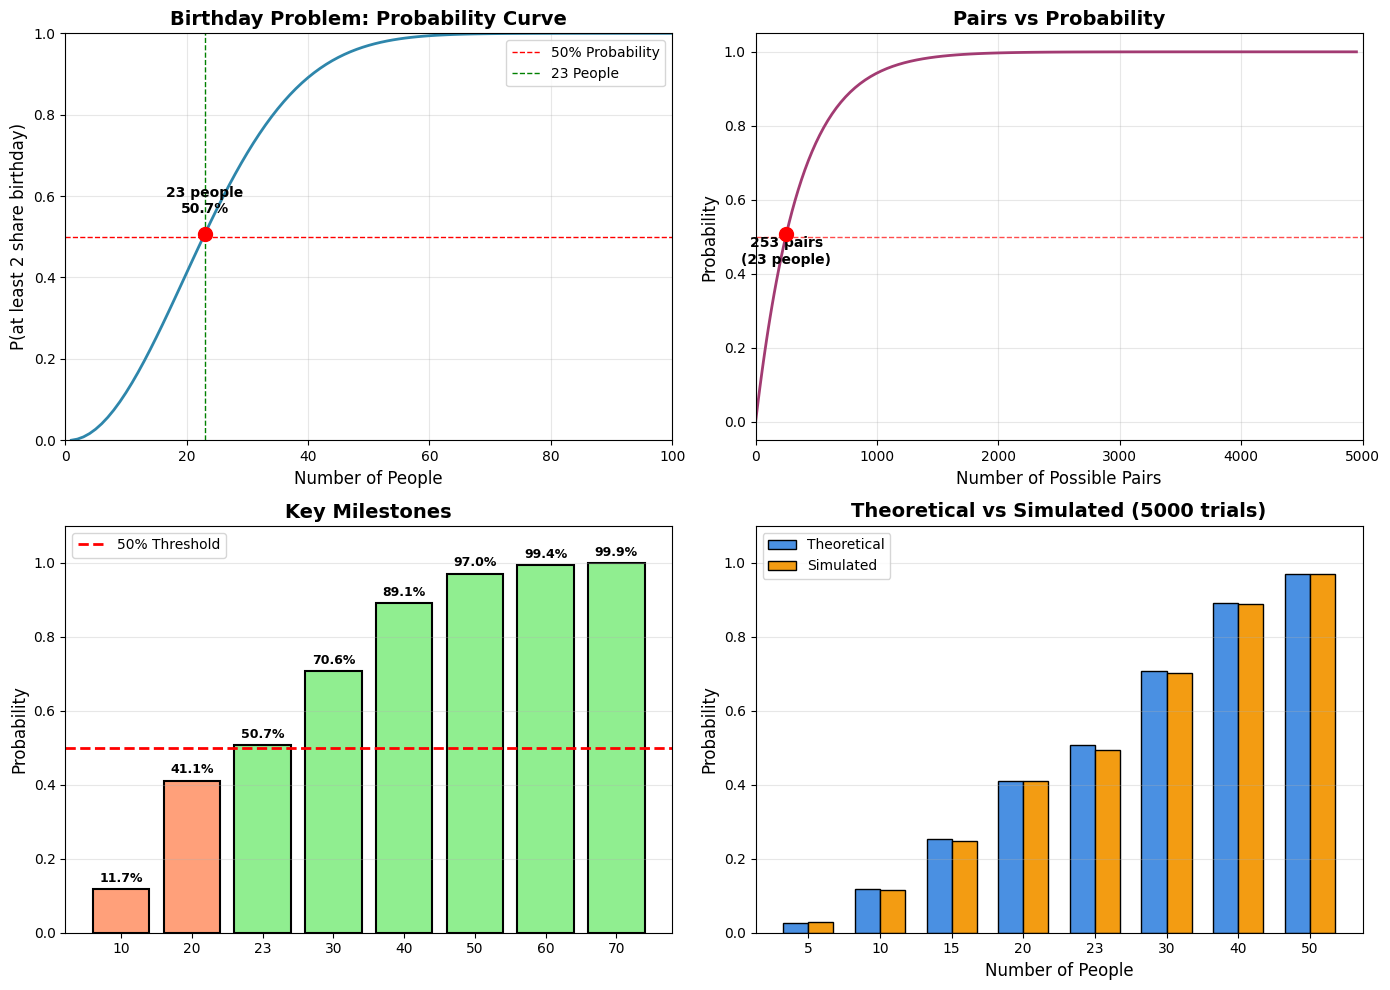

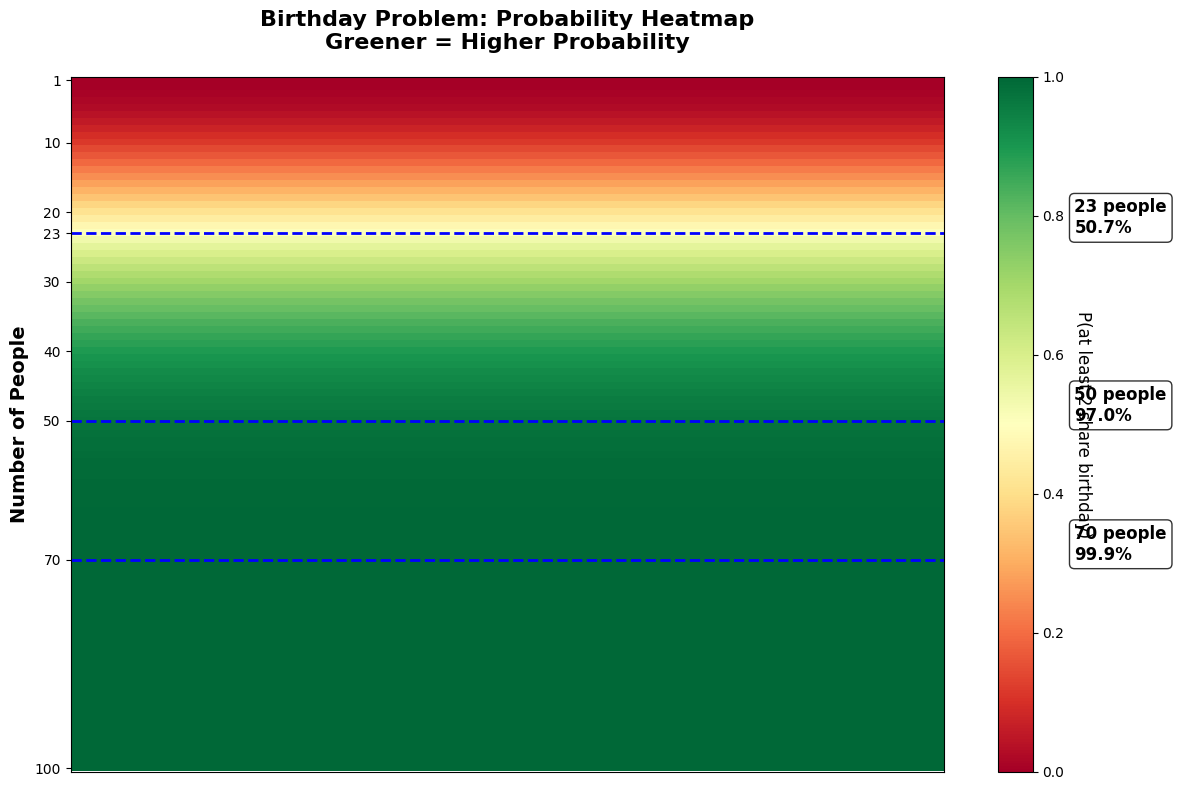


✅ Visualization completed!

💡 Chart explanations:
   1️⃣ Probability Curve: Shows rapid probability increase with more people
   2️⃣ Pairs Count: Explains why 23 people = 50% probability (253 pairs!)
   3️⃣ Key Milestones: Red = below 50%, Green = above 50%
   4️⃣ Theoretical vs Simulated: Validates theoretical calculations
   5️⃣ Heatmap: Visual representation of probability changes with group size


In [8]:
# ============================================
# 生日問題視覺化 (Birthday Problem Visualization)
# ============================================

# 1. 計算 1 到 100 人的機率曲線
n_people = range(1, 101)
probabilities = [birthday_probability(n) for n in n_people]

# 2. 建立圖表
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ========== Figure 1: Probability Curve ==========
ax1 = axes[0, 0]
ax1.plot(n_people, probabilities, linewidth=2, color='#2E86AB')
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=1, label='50% Probability')
ax1.axvline(x=23, color='green', linestyle='--', linewidth=1, label='23 People')
ax1.scatter([23], [birthday_probability(23)], color='red', s=100, zorder=5)
ax1.text(23, birthday_probability(23) + 0.05, f'23 people\n{birthday_probability(23)*100:.1f}%', 
         ha='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Number of People', fontsize=12)
ax1.set_ylabel('P(at least 2 share birthday)', fontsize=12)
ax1.set_title('Birthday Problem: Probability Curve', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 1)

# ========== Figure 2: Number of Pairs vs Probability ==========
ax2 = axes[0, 1]
pairs = [n * (n - 1) // 2 for n in n_people]
ax2.plot(pairs, probabilities, linewidth=2, color='#A23B72')
ax2.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.scatter([253], [birthday_probability(23)], color='red', s=100, zorder=5)
ax2.text(253, birthday_probability(23) - 0.08, f'253 pairs\n(23 people)', 
         ha='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('Number of Possible Pairs', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Pairs vs Probability', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 5000)

# ========== Figure 3: Key Milestones ==========
ax3 = axes[1, 0]
milestones = [10, 20, 23, 30, 40, 50, 60, 70]
milestone_probs = [birthday_probability(n) for n in milestones]
colors = ['#FFA07A' if p < 0.5 else '#90EE90' for p in milestone_probs]

bars = ax3.bar(range(len(milestones)), milestone_probs, color=colors, edgecolor='black', linewidth=1.5)
ax3.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='50% Threshold')

# Add value labels on bars
for i, (n, prob) in enumerate(zip(milestones, milestone_probs)):
    ax3.text(i, prob + 0.02, f'{prob*100:.1f}%', ha='center', fontsize=9, fontweight='bold')

ax3.set_xticks(range(len(milestones)))
ax3.set_xticklabels([f'{n}' for n in milestones])
ax3.set_ylabel('Probability', fontsize=12)
ax3.set_title('Key Milestones', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 1.1)

# ========== Figure 4: Theoretical vs Simulated ==========
ax4 = axes[1, 1]
test_ns = [5, 10, 15, 20, 23, 30, 40, 50]
theoretical_probs = [birthday_probability(n) for n in test_ns]
simulated_probs = [simulate_birthday_problem(n, trials=5000) for n in test_ns]

x_pos = np.arange(len(test_ns))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, theoretical_probs, width, label='Theoretical', 
                color='#4A90E2', edgecolor='black', linewidth=1)
bars2 = ax4.bar(x_pos + width/2, simulated_probs, width, label='Simulated', 
                color='#F39C12', edgecolor='black', linewidth=1)

ax4.set_xlabel('Number of People', fontsize=12)
ax4.set_ylabel('Probability', fontsize=12)
ax4.set_title('Theoretical vs Simulated (5000 trials)', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'{n}' for n in test_ns])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# ========== Additional Visualization: Heatmap ==========
fig2, ax5 = plt.subplots(figsize=(12, 8))

# Create heatmap data
n_range = range(1, 101)
prob_data = []
for n in n_range:
    prob = birthday_probability(n)
    prob_data.append([prob] * 10)  # 重複10次以便視覺化

# 繪製熱圖
im = ax5.imshow(prob_data, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1)

# 標註關鍵點
key_points = [(23, '23 people\n50.7%'), (50, '50 people\n97.0%'), (70, '70 people\n99.9%')]
for n, label in key_points:
    ax5.axhline(y=n-1, color='blue', linestyle='--', linewidth=2)
    ax5.text(11, n-1, label, fontsize=12, fontweight='bold', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax5.set_yticks([0, 9, 19, 22, 29, 39, 49, 69, 99])
ax5.set_yticklabels(['1', '10', '20', '23', '30', '40', '50', '70', '100'])
ax5.set_xticks([])
ax5.set_ylabel('Number of People', fontsize=14, fontweight='bold')
ax5.set_title('Birthday Problem: Probability Heatmap\nGreener = Higher Probability', fontsize=16, fontweight='bold', pad=20)

# 添加顏色條
cbar = plt.colorbar(im, ax=ax5)
cbar.set_label('P(at least 2 share birthday)', rotation=270, labelpad=20, fontsize=12)

plt.tight_layout()
plt.show()

print("\n✅ Visualization completed!")
print("\n💡 Chart explanations:")
print("   1️⃣ Probability Curve: Shows rapid probability increase with more people")
print("   2️⃣ Pairs Count: Explains why 23 people = 50% probability (253 pairs!)")
print("   3️⃣ Key Milestones: Red = below 50%, Green = above 50%")
print("   4️⃣ Theoretical vs Simulated: Validates theoretical calculations")
print("   5️⃣ Heatmap: Visual representation of probability changes with group size")

## 7. 總結與公式表 (Summary)

### 📊 核心公式一覽

| 概念 | 公式 | 說明 |
|------|------|------|
| **條件機率** | $P(A\|B) = \frac{P(A \cap B)}{P(B)}$ | B 發生下 A 的機率 |
| **乘法法則** | $P(A \cap B) = P(A) \cdot P(B\|A)$ | 兩事件同時發生 |
| **全機率公式** | $P(B) = \sum_i P(B\|A_i) \cdot P(A_i)$ | B 的總機率 |
| **貝氏定理** | $P(A\|B) = \frac{P(B\|A) \cdot P(A)}{P(B)}$ | 更新信念 |
| **獨立性** | $P(A \cap B) = P(A) \cdot P(B)$ | 互不影響 |
| **條件獨立** | $P(A \cap B \| C) = P(A\|C) \cdot P(B\|C)$ | 給定 C 後獨立 |

---

### 🔑 關鍵概念對比

**獨立 vs 互斥**：
- **獨立 (Independent)**：$P(A|B) = P(A)$，知道 B 不影響 A
- **互斥 (Mutually Exclusive)**：$P(A \cap B) = 0$，不能同時發生
- ⚠️ **互斥通常不獨立**！（除非 P(A) 或 P(B) = 0）

**先驗 vs 後驗**：
- **先驗 (Prior)**：$P(A)$，在看到證據前的信念
- **後驗 (Posterior)**：$P(A|B)$，看到證據後更新的信念
- **貝氏更新**：從先驗到後驗的過程

---

### 💡 實務建議

1. **條件機率要小心分母**
   - 確保 $P(B) > 0$
   - 在實務中，樣本太小可能導致不穩定

2. **貝氏定理的常見錯誤**
   - 混淆 $P(A|B)$ 和 $P(B|A)$
   - 例如：$P(\text{有病}|\text{陽性})$ ≠ $P(\text{陽性}|\text{有病})$

3. **獨立性假設**
   - Naive Bayes 假設特徵獨立
   - 這個假設常常不成立，但模型依然有效
   - 要理解假設的限制

4. **稀有事件的貝氏推理**
   - 先驗機率很重要
   - 即使測試很準確，後驗機率可能仍然很低
   - 見醫學檢測例子

---

## 8. 練習題 (Practice Problems)

### 🎯 問題 1：條件機率基礎

一副 52 張撲克牌，抽一張：
- A = {抽到 King (K)}
- B = {抽到黑色牌（黑桃或梅花）}

求 $P(A|B)$。

<details>
<summary>點擊查看答案</summary>

**答案**：$\frac{1}{13}$

**解法**：
- $P(A \cap B)$ = {黑色 King} = 2 張 = $\frac{2}{52}$
- $P(B)$ = {黑色牌} = 26 張 = $\frac{26}{52}$
- $P(A|B) = \frac{2/52}{26/52} = \frac{2}{26} = \frac{1}{13}$
</details>

---

### 🎯 問題 2：貝氏定理應用

某種疾病的盛行率是 1%。檢測的敏感度是 95%，特異度是 90%。

如果檢測結果是陽性，實際有病的機率是多少？

<details>
<summary>點擊查看提示</summary>

**提示**：
- $P(D) = 0.01$
- $P(+|D) = 0.95$ (敏感度)
- $P(-|D^c) = 0.90$ (特異度) → $P(+|D^c) = 0.10$
- 使用貝氏定理：$P(D|+) = \frac{P(+|D) \cdot P(D)}{P(+)}$
</details>

<details>
<summary>點擊查看答案</summary>

**答案**：約 8.77%

**解法**：
$$P(+) = P(+|D) \cdot P(D) + P(+|D^c) \cdot P(D^c)$$
$$= 0.95 \times 0.01 + 0.10 \times 0.99 = 0.0095 + 0.099 = 0.1085$$

$$P(D|+) = \frac{0.95 \times 0.01}{0.1085} = \frac{0.0095}{0.1085} \approx 0.0876 = 8.76\%$$
</details>

---

### 🎯 問題 3：獨立性檢驗

擲一顆骰子，定義：
- A = {點數是 3 的倍數} = {3, 6}
- B = {點數是偶數} = {2, 4, 6}

A 和 B 獨立嗎？

<details>
<summary>點擊查看答案</summary>

**答案**：獨立

**解法**：
- $P(A) = \frac{2}{6} = \frac{1}{3}$
- $P(B) = \frac{3}{6} = \frac{1}{2}$
- $P(A \cap B)$ = {6} = $\frac{1}{6}$
- $P(A) \cdot P(B) = \frac{1}{3} \times \frac{1}{2} = \frac{1}{6}$ ✓

因為 $P(A \cap B) = P(A) \cdot P(B)$，所以獨立！
</details>

---

### 🎯 問題 4：連鎖條件機率

一個袋子裡有 5 個紅球、3 個藍球，連續抽 3 次（不放回），3 次都是紅球的機率？

<details>
<summary>點擊查看答案</summary>

**答案**：$\frac{5}{28} \approx 0.1786$

**解法**：使用乘法法則
$$P(R_1 \cap R_2 \cap R_3) = P(R_1) \cdot P(R_2|R_1) \cdot P(R_3|R_1 \cap R_2)$$
$$= \frac{5}{8} \times \frac{4}{7} \times \frac{3}{6} = \frac{60}{336} = \frac{5}{28}$$
</details>

---

## 📚 延伸閱讀

1. **原始教材**：[Introduction to Probability - Conditional Probability](https://bookdown.org/probability/beta/conditional-probability.html)
2. **貝氏統計**：[Bayesian Statistics on Wikipedia](https://en.wikipedia.org/wiki/Bayesian_statistics)
3. **Naive Bayes**：[scikit-learn Naive Bayes Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)
4. **實務應用**：[Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)


## 8. 二項分佈 (Binomial Distribution)

### 📖 理論基礎

**二項分佈**描述在 $n$ 次獨立的伯努利試驗中，成功次數 $X$ 的機率分佈。每次試驗只有兩種結果：成功或失敗。

### 🎯 核心公式

對於 $X \sim \text{Binomial}(n, p)$：

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, 2, \ldots, n$$

其中：
- $n$：試驗次數
- $p$：每次試驗成功的機率
- $k$：成功的次數
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$：組合數

### 📊 重要性質

| 性質 | 公式 | 說明 |
|------|------|------|
| **期望值 (Expected Value)** | $E[X] = np$ | 平均成功次數 |
| **變異數 (Variance)** | $\text{Var}(X) = np(1-p)$ | 成功次數的離散程度 |
| **標準差 (Standard Deviation)** | $\sigma = \sqrt{np(1-p)}$ | 變異數的平方根 |

### 🔑 使用條件

二項分佈適用於滿足以下條件的情境：

1. ✅ **固定試驗次數**：進行固定的 $n$ 次試驗
2. ✅ **獨立性**：每次試驗相互獨立
3. ✅ **二元結果**：每次試驗只有成功/失敗兩種結果
4. ✅ **固定機率**：每次試驗成功的機率 $p$ 保持不變

### 💡 實際應用範例

1. **品質控制**：檢查 100 個產品，每個產品有 5% 的缺陷率，缺陷產品數量
2. **醫學試驗**：50 位患者接受治療，治療成功率 70%，成功案例數
3. **市場調查**：調查 200 位顧客，每位有 30% 購買機率，實際購買人數
4. **考試答題**：20 道選擇題，每題猜對機率 25%，猜對題數
5. **機器學習**：二元分類器在測試集上的正確預測數量

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, factorial

def binomial_pmf(n, p, k):
    """
    Calculate the probability mass function of binomial distribution
    
    Parameters:
    -----------
    n : int - number of trials
    p : float - probability of success
    k : int - number of successes
    
    Returns:
    --------
    float - P(X = k)
    """
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def binomial_mean(n, p):
    """Calculate expected value E[X] = np"""
    return n * p

def binomial_variance(n, p):
    """Calculate variance Var(X) = np(1-p)"""
    return n * p * (1 - p)

def binomial_std(n, p):
    """Calculate standard deviation σ = sqrt(np(1-p))"""
    return np.sqrt(binomial_variance(n, p))

# Example: Coin flips
print("📌 Example 1: Fair Coin Flips")
print("=" * 50)
n = 10  # 10 flips
p = 0.5  # fair coin

print(f"Scenario: Flip a fair coin {n} times")
print(f"Probability of heads: {p}")
print()

# Calculate probabilities for different number of heads
for k in range(11):
    prob = binomial_pmf(n, p, k)
    print(f"P(X = {k:2d} heads) = {prob:.4f} = {prob*100:5.2f}%")

print()
print(f"Expected value E[X] = {binomial_mean(n, p):.2f} heads")
print(f"Variance Var(X) = {binomial_variance(n, p):.2f}")
print(f"Standard deviation σ = {binomial_std(n, p):.2f}")

print("\n" + "=" * 50)
print("📌 Example 2: Quality Control")
print("=" * 50)
n2 = 100  # inspect 100 products
p2 = 0.05  # 5% defect rate

print(f"Scenario: Inspect {n2} products with {p2*100}% defect rate")
print()

# Probability of exactly 5 defects
k2 = 5
prob_exact = binomial_pmf(n2, p2, k2)
print(f"P(exactly {k2} defects) = {prob_exact:.4f} = {prob_exact*100:.2f}%")

# Probability of at most 3 defects
prob_at_most_3 = sum(binomial_pmf(n2, p2, k) for k in range(4))
print(f"P(at most 3 defects) = {prob_at_most_3:.4f} = {prob_at_most_3*100:.2f}%")

# Probability of more than 10 defects
prob_more_than_10 = sum(binomial_pmf(n2, p2, k) for k in range(11, n2+1))
print(f"P(more than 10 defects) = {prob_more_than_10:.4f} = {prob_more_than_10*100:.2f}%")

print()
print(f"Expected defects E[X] = {binomial_mean(n2, p2):.2f}")
print(f"Standard deviation σ = {binomial_std(n2, p2):.2f}")

📌 Example 1: Fair Coin Flips
Scenario: Flip a fair coin 10 times
Probability of heads: 0.5

P(X =  0 heads) = 0.0010 =  0.10%
P(X =  1 heads) = 0.0098 =  0.98%
P(X =  2 heads) = 0.0439 =  4.39%
P(X =  3 heads) = 0.1172 = 11.72%
P(X =  4 heads) = 0.2051 = 20.51%
P(X =  5 heads) = 0.2461 = 24.61%
P(X =  6 heads) = 0.2051 = 20.51%
P(X =  7 heads) = 0.1172 = 11.72%
P(X =  8 heads) = 0.0439 =  4.39%
P(X =  9 heads) = 0.0098 =  0.98%
P(X = 10 heads) = 0.0010 =  0.10%

Expected value E[X] = 5.00 heads
Variance Var(X) = 2.50
Standard deviation σ = 1.58

📌 Example 2: Quality Control
Scenario: Inspect 100 products with 5.0% defect rate

P(exactly 5 defects) = 0.1800 = 18.00%
P(at most 3 defects) = 0.2578 = 25.78%
P(more than 10 defects) = 0.0115 = 1.15%

Expected defects E[X] = 5.00
Standard deviation σ = 2.18



📊 BINOMIAL DISTRIBUTION VISUALIZATIONS


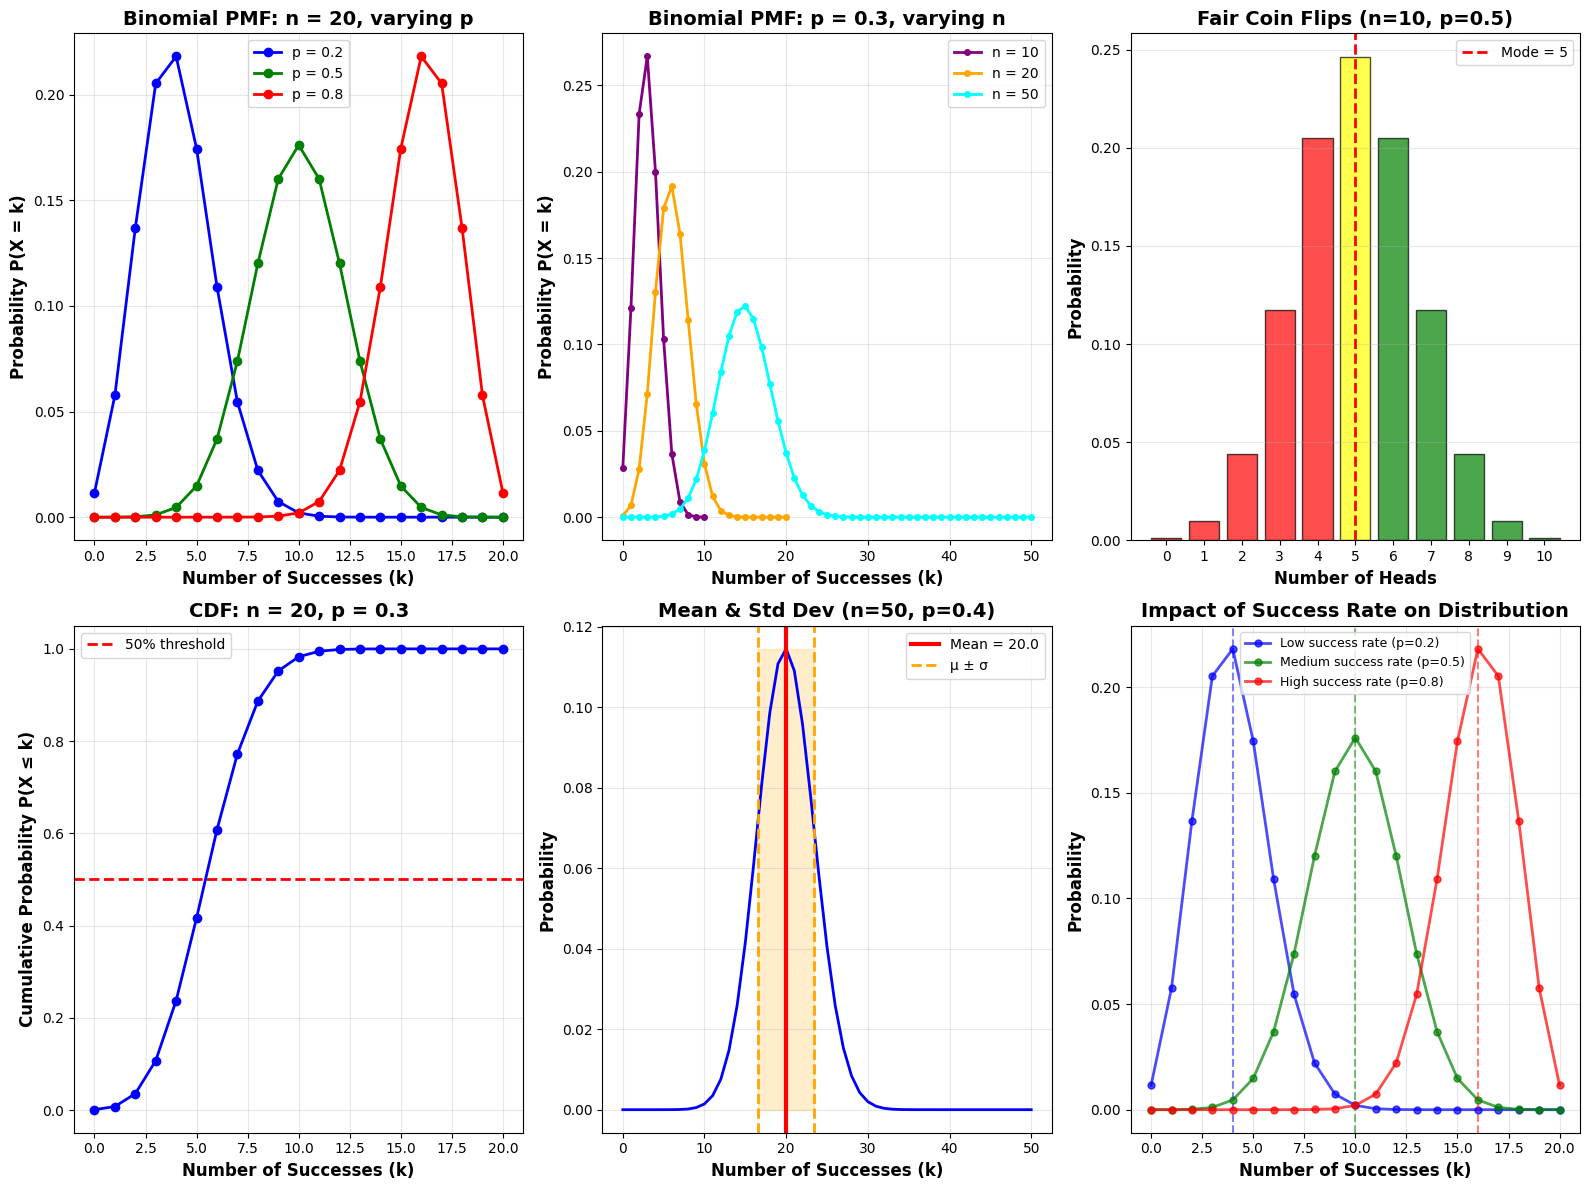


✅ Visualization completed!

💡 Chart explanations:
   1️⃣ Varying p: Shows how probability of success affects distribution shape
   2️⃣ Varying n: Shows how number of trials affects distribution spread
   3️⃣ Fair Coin: Classic example with symmetric distribution
   4️⃣ CDF: Cumulative probabilities - useful for 'at most k' questions
   5️⃣ Mean & Std: Visual representation of central tendency and spread
   6️⃣ Comparison: Side-by-side view of different success rates


In [10]:
print("\n" + "=" * 70)
print("📊 BINOMIAL DISTRIBUTION VISUALIZATIONS")
print("=" * 70)

# Create comprehensive visualizations
fig = plt.figure(figsize=(16, 12))

# 1. PMF for different values of p (fixed n)
ax1 = plt.subplot(2, 3, 1)
n_fixed = 20
p_values = [0.2, 0.5, 0.8]
colors = ['blue', 'green', 'red']

for p_val, color in zip(p_values, colors):
    k_values = range(n_fixed + 1)
    probabilities = [binomial_pmf(n_fixed, p_val, k) for k in k_values]
    ax1.plot(k_values, probabilities, 'o-', color=color, label=f'p = {p_val}', linewidth=2, markersize=6)

ax1.set_xlabel('Number of Successes (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability P(X = k)', fontsize=12, fontweight='bold')
ax1.set_title(f'Binomial PMF: n = {n_fixed}, varying p', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. PMF for different values of n (fixed p)
ax2 = plt.subplot(2, 3, 2)
p_fixed = 0.3
n_values = [10, 20, 50]
colors2 = ['purple', 'orange', 'cyan']

for n_val, color in zip(n_values, colors2):
    k_values = range(n_val + 1)
    probabilities = [binomial_pmf(n_val, p_fixed, k) for k in k_values]
    ax2.plot(k_values, probabilities, 'o-', color=color, label=f'n = {n_val}', linewidth=2, markersize=4)

ax2.set_xlabel('Number of Successes (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability P(X = k)', fontsize=12, fontweight='bold')
ax2.set_title(f'Binomial PMF: p = {p_fixed}, varying n', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Bar chart for fair coin (n=10, p=0.5)
ax3 = plt.subplot(2, 3, 3)
n_coin = 10
p_coin = 0.5
k_values = range(n_coin + 1)
probabilities = [binomial_pmf(n_coin, p_coin, k) for k in k_values]
colors3 = ['red' if k < 5 else 'yellow' if k == 5 else 'green' for k in k_values]

bars = ax3.bar(k_values, probabilities, color=colors3, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Number of Heads', fontsize=12, fontweight='bold')
ax3.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax3.set_title(f'Fair Coin Flips (n={n_coin}, p={p_coin})', fontsize=14, fontweight='bold')
ax3.set_xticks(k_values)

# Highlight the mode
mode_k = n_coin // 2
ax3.axvline(x=mode_k, color='red', linestyle='--', linewidth=2, label=f'Mode = {mode_k}')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Cumulative Distribution Function (CDF)
ax4 = plt.subplot(2, 3, 4)
n_cdf = 20
p_cdf = 0.3
k_values = range(n_cdf + 1)
cdf_values = [sum(binomial_pmf(n_cdf, p_cdf, j) for j in range(k+1)) for k in k_values]

ax4.plot(k_values, cdf_values, 'bo-', linewidth=2, markersize=6)
ax4.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='50% threshold')
ax4.set_xlabel('Number of Successes (k)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cumulative Probability P(X ≤ k)', fontsize=12, fontweight='bold')
ax4.set_title(f'CDF: n = {n_cdf}, p = {p_cdf}', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Mean and Standard Deviation Visualization
ax5 = plt.subplot(2, 3, 5)
n_mean = 50
p_mean = 0.4
k_values = range(n_mean + 1)
probabilities = [binomial_pmf(n_mean, p_mean, k) for k in k_values]

mean = binomial_mean(n_mean, p_mean)
std = binomial_std(n_mean, p_mean)

ax5.plot(k_values, probabilities, 'b-', linewidth=2)
ax5.axvline(x=mean, color='red', linestyle='-', linewidth=3, label=f'Mean = {mean:.1f}')
ax5.axvline(x=mean - std, color='orange', linestyle='--', linewidth=2, label=f'μ ± σ')
ax5.axvline(x=mean + std, color='orange', linestyle='--', linewidth=2)
ax5.fill_betweenx([0, max(probabilities)], mean - std, mean + std, alpha=0.2, color='orange')

ax5.set_xlabel('Number of Successes (k)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax5.set_title(f'Mean & Std Dev (n={n_mean}, p={p_mean})', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Comparison: Different scenarios
ax6 = plt.subplot(2, 3, 6)
scenarios = [
    (20, 0.2, 'Low success rate (p=0.2)', 'blue'),
    (20, 0.5, 'Medium success rate (p=0.5)', 'green'),
    (20, 0.8, 'High success rate (p=0.8)', 'red')
]

for n_s, p_s, label, color in scenarios:
    k_values = range(n_s + 1)
    probabilities = [binomial_pmf(n_s, p_s, k) for k in k_values]
    mean_s = binomial_mean(n_s, p_s)
    ax6.plot(k_values, probabilities, 'o-', color=color, label=label, linewidth=2, markersize=5, alpha=0.7)
    ax6.axvline(x=mean_s, color=color, linestyle='--', linewidth=1.5, alpha=0.5)

ax6.set_xlabel('Number of Successes (k)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax6.set_title('Impact of Success Rate on Distribution', fontsize=14, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization completed!")
print("\n💡 Chart explanations:")
print("   1️⃣ Varying p: Shows how probability of success affects distribution shape")
print("   2️⃣ Varying n: Shows how number of trials affects distribution spread")
print("   3️⃣ Fair Coin: Classic example with symmetric distribution")
print("   4️⃣ CDF: Cumulative probabilities - useful for 'at most k' questions")
print("   5️⃣ Mean & Std: Visual representation of central tendency and spread")
print("   6️⃣ Comparison: Side-by-side view of different success rates")

### 🎯 實際應用案例分析

#### 案例 1：醫療診斷測試

假設某種疾病的基因測試在患者身上的準確率為 95%。對 100 位患者進行測試。

**問題**：
1. 期望有多少位患者被正確診斷？
2. 至少 90 位患者被正確診斷的機率？
3. 恰好 100 位全部正確的機率？

🏥 CASE STUDY 1: Medical Diagnosis
Scenario: Test 100 patients with 95.0% accuracy

1️⃣ Expected correctly diagnosed patients: 95.00
2️⃣ P(at least 90 correct) = 0.9885 = 98.85%
3️⃣ P(all 100 correct) = 0.005921 = 0.5921%

Standard deviation σ = 2.18
This means we expect 95 ± 2.18 correct diagnoses


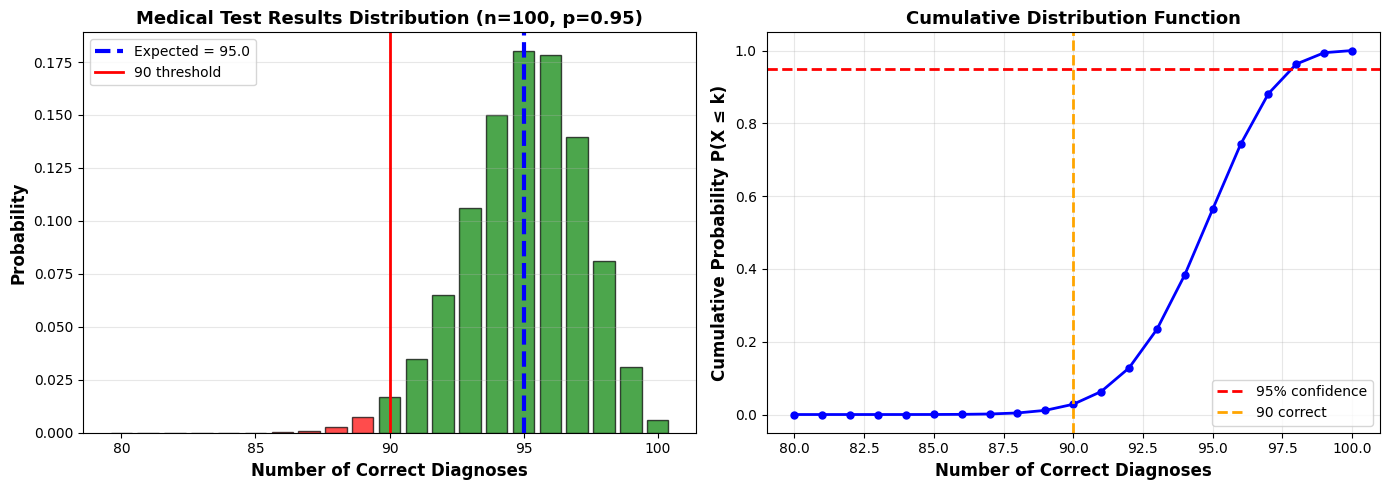

In [11]:
print("=" * 70)
print("🏥 CASE STUDY 1: Medical Diagnosis")
print("=" * 70)

n_patients = 100
p_accuracy = 0.95

print(f"Scenario: Test {n_patients} patients with {p_accuracy*100}% accuracy")
print()

# Question 1: Expected value
expected_correct = binomial_mean(n_patients, p_accuracy)
print(f"1️⃣ Expected correctly diagnosed patients: {expected_correct:.2f}")

# Question 2: At least 90 correct
prob_at_least_90 = sum(binomial_pmf(n_patients, p_accuracy, k) for k in range(90, n_patients + 1))
print(f"2️⃣ P(at least 90 correct) = {prob_at_least_90:.4f} = {prob_at_least_90*100:.2f}%")

# Question 3: All 100 correct
prob_all_correct = binomial_pmf(n_patients, p_accuracy, n_patients)
print(f"3️⃣ P(all 100 correct) = {prob_all_correct:.6f} = {prob_all_correct*100:.4f}%")

print()
print(f"Standard deviation σ = {binomial_std(n_patients, p_accuracy):.2f}")
print(f"This means we expect 95 ± {binomial_std(n_patients, p_accuracy):.2f} correct diagnoses")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
k_range = range(80, n_patients + 1)
probs = [binomial_pmf(n_patients, p_accuracy, k) for k in k_range]
colors = ['red' if k < 90 else 'green' for k in k_range]

ax1.bar(k_range, probs, color=colors, alpha=0.7, edgecolor='black')
ax1.axvline(x=expected_correct, color='blue', linestyle='--', linewidth=3, label=f'Expected = {expected_correct:.1f}')
ax1.axvline(x=90, color='red', linestyle='-', linewidth=2, label='90 threshold')
ax1.set_xlabel('Number of Correct Diagnoses', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax1.set_title(f'Medical Test Results Distribution (n={n_patients}, p={p_accuracy})', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# CDF for cumulative probabilities
cdf_vals = [sum(binomial_pmf(n_patients, p_accuracy, j) for j in range(k+1)) for k in k_range]
ax2.plot(k_range, cdf_vals, 'bo-', linewidth=2, markersize=5)
ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% confidence')
ax2.axvline(x=90, color='orange', linestyle='--', linewidth=2, label='90 correct')
ax2.set_xlabel('Number of Correct Diagnoses', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Probability P(X ≤ k)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)

#### 案例 2：機器學習分類器評估

你訓練了一個二元分類器，在驗證集上的準確率為 85%。測試集有 200 個樣本。

**問題**：
1. 期望正確分類多少個樣本？
2. 正確分類樣本數在 160-180 之間的機率？
3. 少於 150 個正確分類的機率（模型是否可能表現不佳）？

🤖 CASE STUDY 2: Machine Learning Classifier Evaluation
Scenario: Test classifier on 200 samples with 85.0% accuracy

1️⃣ Expected correctly classified: 170.00 ± 5.05
2️⃣ P(160 ≤ X ≤ 180) = 0.9631 = 96.31%
3️⃣ P(X < 150) = 0.000077 = 0.0077%
   ⚠️ Very low probability - model performing poorly is unlikely!

📊 95% Confidence Interval: [160.1, 179.9]
   Meaning: 95% of the time, correct predictions will be in this range


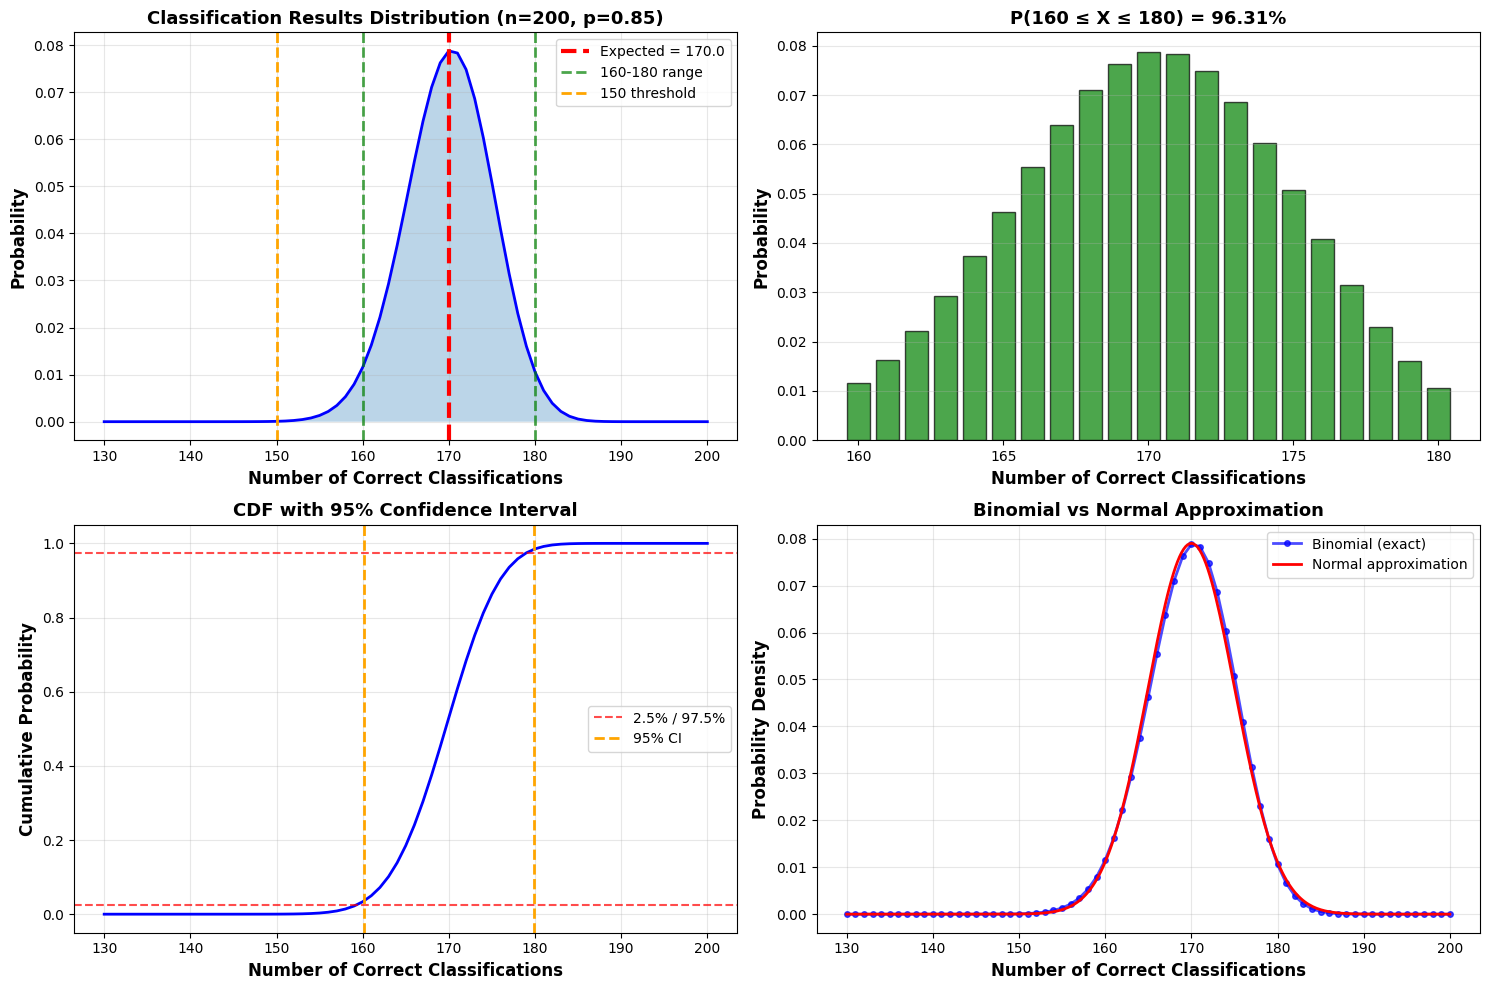


✅ Analysis complete!

💡 Key insights:
   • The expected accuracy matches training: ~85%
   • 95% confidence interval is quite tight due to large sample size
   • Probability of poor performance (< 150 correct) is negligible
   • Normal approximation works well for large n


In [12]:
print("=" * 70)
print("🤖 CASE STUDY 2: Machine Learning Classifier Evaluation")
print("=" * 70)

n_samples = 200
p_acc = 0.85

print(f"Scenario: Test classifier on {n_samples} samples with {p_acc*100}% accuracy")
print()

# Question 1: Expected value
expected_correct = binomial_mean(n_samples, p_acc)
std_dev = binomial_std(n_samples, p_acc)
print(f"1️⃣ Expected correctly classified: {expected_correct:.2f} ± {std_dev:.2f}")

# Question 2: Between 160 and 180 correct
prob_160_180 = sum(binomial_pmf(n_samples, p_acc, k) for k in range(160, 181))
print(f"2️⃣ P(160 ≤ X ≤ 180) = {prob_160_180:.4f} = {prob_160_180*100:.2f}%")

# Question 3: Less than 150 correct
prob_less_150 = sum(binomial_pmf(n_samples, p_acc, k) for k in range(150))
print(f"3️⃣ P(X < 150) = {prob_less_150:.6f} = {prob_less_150*100:.4f}%")
print(f"   ⚠️ Very low probability - model performing poorly is unlikely!")

# Additional insights
confidence_interval_95 = (expected_correct - 1.96 * std_dev, expected_correct + 1.96 * std_dev)
print()
print(f"📊 95% Confidence Interval: [{confidence_interval_95[0]:.1f}, {confidence_interval_95[1]:.1f}]")
print(f"   Meaning: 95% of the time, correct predictions will be in this range")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Full distribution
ax1 = axes[0, 0]
k_range_full = range(130, n_samples + 1)
probs_full = [binomial_pmf(n_samples, p_acc, k) for k in k_range_full]

ax1.plot(k_range_full, probs_full, 'b-', linewidth=2)
ax1.fill_between(k_range_full, probs_full, alpha=0.3)
ax1.axvline(x=expected_correct, color='red', linestyle='--', linewidth=3, label=f'Expected = {expected_correct:.1f}')
ax1.axvline(x=160, color='green', linestyle='--', linewidth=2, alpha=0.7, label='160-180 range')
ax1.axvline(x=180, color='green', linestyle='--', linewidth=2, alpha=0.7)
ax1.axvline(x=150, color='orange', linestyle='--', linewidth=2, label='150 threshold')
ax1.set_xlabel('Number of Correct Classifications', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax1.set_title(f'Classification Results Distribution (n={n_samples}, p={p_acc})', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Highlighted region (160-180)
ax2 = axes[0, 1]
k_range_160_180 = range(160, 181)
probs_160_180 = [binomial_pmf(n_samples, p_acc, k) for k in k_range_160_180]

ax2.bar(k_range_160_180, probs_160_180, color='green', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Number of Correct Classifications', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax2.set_title(f'P(160 ≤ X ≤ 180) = {prob_160_180:.2%}', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. CDF with confidence intervals
ax3 = axes[1, 0]
k_range_cdf = range(130, n_samples + 1)
cdf_vals = [sum(binomial_pmf(n_samples, p_acc, j) for j in range(k+1)) for k in k_range_cdf]

ax3.plot(k_range_cdf, cdf_vals, 'b-', linewidth=2)
ax3.axhline(y=0.025, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='2.5% / 97.5%')
ax3.axhline(y=0.975, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax3.axvline(x=confidence_interval_95[0], color='orange', linestyle='--', linewidth=2, label='95% CI')
ax3.axvline(x=confidence_interval_95[1], color='orange', linestyle='--', linewidth=2)
ax3.set_xlabel('Number of Correct Classifications', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
ax3.set_title('CDF with 95% Confidence Interval', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Comparison with normal approximation
ax4 = axes[1, 1]
# Binomial
probs_compare = [binomial_pmf(n_samples, p_acc, k) for k in k_range_full]
ax4.plot(k_range_full, probs_compare, 'bo-', linewidth=2, markersize=4, label='Binomial (exact)', alpha=0.7)

# Normal approximation
from scipy.stats import norm
mean_norm = expected_correct
std_norm = std_dev
x_norm = np.linspace(130, n_samples, 300)
y_norm = norm.pdf(x_norm, mean_norm, std_norm)
ax4.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal approximation')

ax4.set_xlabel('Number of Correct Classifications', fontsize=12, fontweight='bold')
ax4.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax4.set_title('Binomial vs Normal Approximation', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Analysis complete!")
print("\n💡 Key insights:")
print("   • The expected accuracy matches training: ~85%")
print("   • 95% confidence interval is quite tight due to large sample size")
print("   • Probability of poor performance (< 150 correct) is negligible")
print("   • Normal approximation works well for large n")
print("=" * 70)

### 📝 二項分佈總結

#### 核心要點

1. **適用場景**：固定次數的獨立重複試驗，每次只有成功/失敗兩種結果
2. **關鍵公式**：
   - PMF: $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$
   - 期望值: $E[X] = np$
   - 變異數: $\text{Var}(X) = np(1-p)$
3. **常見誤解**：
   - ❌ 試驗之間必須相互獨立
   - ❌ 成功機率 $p$ 必須固定
   - ❌ 不適用於「有放回」以外的抽樣
4. **實用技巧**：
   - 當 $n$ 很大時，可用常態分佈近似
   - 計算 $P(X \geq k)$ 時，使用 $1 - P(X < k)$ 可能更快
   - 可用 CDF 回答「至多」或「至少」的問題

#### 🧮 練習題

**問題 1**：擲一枚公正硬幣 8 次，恰好出現 3 次正面的機率是多少？

<details>
<summary>點擊查看答案</summary>

$$P(X = 3) = \binom{8}{3} (0.5)^3 (0.5)^5 = 56 \times \frac{1}{256} = \frac{56}{256} = 0.21875$$

**答案**：約 21.88%
</details>

---

**問題 2**：一個多選題測驗有 20 題，每題 4 個選項。如果完全靠猜，期望能答對幾題？標準差是多少？

<details>
<summary>點擊查看答案</summary>

- $n = 20$, $p = 0.25$ (猜對機率)
- $E[X] = np = 20 \times 0.25 = 5$ 題
- $\sigma = \sqrt{np(1-p)} = \sqrt{20 \times 0.25 \times 0.75} = \sqrt{3.75} \approx 1.94$ 題

**答案**：期望答對 5 題，標準差約 1.94 題
</details>

---

**問題 3**：某網站的點擊率（CTR）為 2%。如果有 1000 位訪客，至少有 25 次點擊的機率有多大？

<details>
<summary>點擊查看答案</summary>

- $n = 1000$, $p = 0.02$
- $E[X] = 1000 \times 0.02 = 20$ 次點擊
- $P(X \geq 25) = 1 - P(X \leq 24)$

使用常態近似：
- $\mu = 20$, $\sigma = \sqrt{1000 \times 0.02 \times 0.98} \approx 4.43$
- 標準化：$z = \frac{25 - 20}{4.43} \approx 1.13$
- $P(Z \geq 1.13) \approx 0.1292$

**答案**：約 12.92%
</details>

---

### 📚 延伸學習

1. **常態近似**：當 $np > 5$ 且 $n(1-p) > 5$ 時，二項分佈可近似為常態分佈
2. **泊松近似**：當 $n$ 很大而 $p$ 很小時，可用泊松分佈近似
3. **負二項分佈**：研究「第 $r$ 次成功所需的試驗次數」
4. **幾何分佈**：特殊的負二項分佈（$r = 1$），研究「第一次成功所需的試驗次數」

### 🔗 相關資源

- **NumPy**: `numpy.random.binomial(n, p, size)` - 生成二項分佈隨機數
- **SciPy**: `scipy.stats.binom` - 完整的二項分佈統計函數
- **實際應用**：A/B Testing, 品質控制, 風險評估, 機器學習評估